__Eithar Elfatih Burie Abdelrahman DS2403__

 <div style= 'background-color: blue; color: orange;  padding :10px;'>
<h1>  Census Income Prediction</h1>
 </div>
 


 <div style= 'color: orange;  padding :10px;'>
<h2> Problem Identification</h2>
 </div>

 <div style= 'color: blue;  padding :10px;'><h3> Project Description</h3>
 </div>

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

    1.	A single cell estimate of the population 16+ for each state.
    2.	Controls for Hispanic Origin by age and sex.
    3.	Controls by Race, age and sex.
    
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-
•	https://github.com/dsrscientist/dataset1/blob/master/census_income.csv





__________________________

 <div style= 'background-color: blue; color: orange;  padding :10px;'> <h1> Import necessary libraries</h1>  </div>


In [1]:
pip install --upgrade joblib


Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import sklearn

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

from joblib import load
from sklearn.svm import SVR 
from scipy.stats import skew, stats, boxcox,yeojohnson
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, auc


 <div style= 'background-color: orange; color: blue;  padding :10px;'> <h1> Loading Data</h1>  </div>


In [3]:
#read dataset
URL=r'C:\\Users\\eitha\\OneDrive\\Documents\\data science\\datatrained\\flip robo internship\\evaluation projects\\phase 3\\census_income.csv'
cen_=pd.read_csv(URL)


_______

 <div style= 'background-color: orange; color: blue;  padding :10px;'> <h1> Exploratory Data Analysis</h1>  </div>


<div style= 'color: blue;  padding :10px;'><h3>a. Head / Tail</h3>
 </div>


In [4]:
#create dataframe of csv
df=pd.DataFrame(cen_)
df.index=df.index+1

#show max
pd.set_option('Display.max_columns', None)

#show dataset head 
df.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [5]:
#show dataset tail
df.tail(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Here we have a brief idea about the size and layout of the dataset.

 <div style= 'color: orange;  padding :10px;'><h3>b.Data Structure</h3>
 </div>


 <div style= 'color: blue;  padding :10px;'><h4>Size, Shape and Columns</h4>
 </div>


In [6]:
# show size/shapecolumns of our dataset.
print('The dataset has a size of:',df.size)
print('The dataset has a shape:',df.shape)
print('The dataset has a set of columns:\n',df.columns)

The dataset has a size of: 488400
The dataset has a shape: (32560, 15)
The dataset has a set of columns:
 Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')


 <div style= 'color: blue;  padding :10px;'><h2>c.Info</h2>
 </div>

In [7]:
#Show information about the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


 <div style= 'color: blue;  padding :10px;'><h3>d. Data type</h3>
 </div>

In [8]:
# show data types sorted
print('The data type of each column is as follows:\n')
print(df.dtypes.sort_values())

The data type of each column is as follows:

Age                int64
Fnlwgt             int64
Education_num      int64
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Workclass         object
Education         object
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Native_country    object
Income            object
dtype: object


After checking the basic information of our dataset, we can observe the following: 

- The data set is large consisting of 32560 rows and 15 columns. 
- There are two data types: int64 and object so we are working with both numerical and categorical data
- From df.info we can see that there are no null values in various features that need to be sorted



In [9]:
df.nunique().to_frame()

,0
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


Fnlwgt has a huge uniqur value and seems irrelevant to the analysis so i will drop it 

In [10]:
#remove Restaurant ID from dataframe
df.drop(columns=['Fnlwgt'], axis=1, inplace=True)
df.shape 

(32560, 14)

 <div style= 'background-color: orange; color: white;  padding :10px;'> <h1> Objective</h1>  </div>



__The goal of this project is to build and develop a machine learning predictive model,that clasifies individuals as one of two: earning above 50k or less than 50k. The outcome of this is based on socio-economic and demographic attributes. As the target variable is 'Income', which is categorical and provides two possible outcomes, our problem is a classification type.  '__


<div style= 'color: orange;  padding :10px;'><h3>Feature types</h3>
 </div>

 <div style= 'color: blue;  padding :10px;'><h4>_Categorical features :_ </h4>
 </div>

   - Workclass --- type of employment       
   - Education ---the highest level of education an individual has reached         
   - Marital status ---  the marital staus of an indivual
   - occupation   --- the type of occupation an individual has
   - relationship --- relation to the household
   - race --- race of individual
   - sex --- gender of individual    
   - Native-country --- which country the individual is originally from   
   - Education_num --- the years an idividual has been in education    
_________________________________________________________   
   <div style= 'color: blue;  padding :10px;'><h4>__Target Feature:__</h4>
 </div> 
 
   - Income how much an individual earns per year (<=50K or >50K)         >>> Categorical 
_________________________________________________________

 <div style= 'color: blue;  padding :10px;'><h4>____Numerical features :___</h4>
 </div> 

   - Age --- the age of the individual                                                          
   - Capital-gain --- profit earned by an individual (profit from selling assets)     
   - Capital-loss --- loss incurred by an individual (loss from selling assets)        
   - Hours-per-week --- Number of hours worked per week




In [11]:
#move Targets to first columns
# list of columns 
cols_=list(df.columns)

cols_.remove('Income')

order_=['Income'] + cols_

df=df[order_]

df.sample(10)

,Income,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
19664,<=50K,52,Private,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
9639,>50K,46,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States
15375,>50K,49,Local-gov,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
12869,<=50K,18,Private,Some-college,10,Never-married,Sales,Own-child,Black,Male,0,0,35,United-States
9554,<=50K,46,Federal-gov,Assoc-voc,11,Separated,Tech-support,Not-in-family,Other,Female,0,0,30,United-States
26553,<=50K,20,Private,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,70,United-States
4623,<=50K,17,Private,11th,7,Never-married,Other-service,Own-child,White,Female,0,0,16,United-States
13119,<=50K,37,Private,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States
24190,<=50K,59,Self-emp-inc,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
24827,<=50K,26,Local-gov,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,Peru


In [12]:
#remove from dataframe
#df.drop('Fnlwgt', axis=1, inplace=True)


<div style= 'color: blue;  padding :10px;'><h3>Define Feature Categories</h3>
 </div>

In [13]:
# create target variable
t='Income'

# create categorical and numerical list (without targets)

num_cols=[]
cat_cols=[]

for col in df.dtypes.index:
    if col =='Income':
        continue
    if df.dtypes[col] in ['int64','float64']:
        num_cols.append(col)
    elif df.dtypes[col] in ['object']:
        cat_cols.append(col)
              
print(f'Numerical columns: \n{num_cols}')
print(len(num_cols))
print(f'\nCategorical columns:\n {cat_cols}')    
print(len(cat_cols))

Numerical columns: 
['Age', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
5

Categorical columns:
 ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']
8


__________________________

 <div style= 'background-color: orange; color: blue;  padding :10px;'> <h1>Data Pre-processing </h1>  </div>



<div style= 'color: orange;  padding :10px;'><h3>Duplicates</h3>
 </div>


In [14]:
#indentify amount of duplicates (if any)
print('From this, we can see there are no duplicates in this data set.')
df.duplicated().sum()

From this, we can see there are no duplicates in this data set.


3465

In [15]:
print('Number of rows before dropping duplicates', len(df))
#delete duplicated rows
df=df.drop_duplicates()
print('Number of rows after dropping duplicates', len(df))

Number of rows before dropping duplicates 32560
Number of rows after dropping duplicates 29095


<div style= 'color: orange;  padding :10px;'><h3>Missing Values</h3>
 </div>

In [16]:
# sum of missing values in data set 
print('From this, we can see there are many null values in the data set. Now i will investigate further and either drop or impute')
df.isnull().sum().sum()

From this, we can see there are many null values in the data set. Now i will investigate further and either drop or impute


0

<div style= 'color: orange;  padding :10px;'><h3>Heatmap of nulls</h3>
 </div>

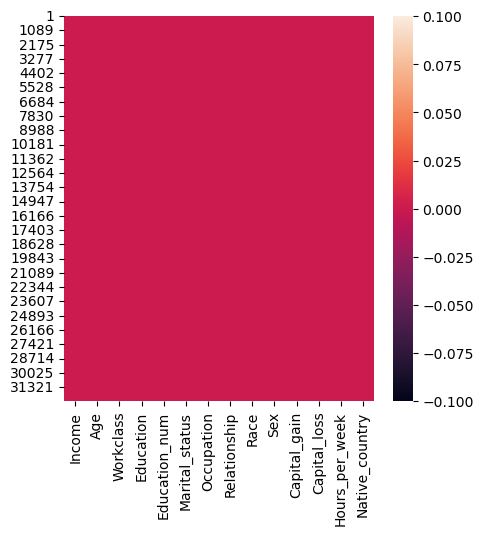

In [17]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isna())
plt.show()

- There are no missing values in our datset.

In [18]:
df.columns

Index(['Income', 'Age', 'Workclass', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country'],
      dtype='object')

In [19]:
df.nunique().to_frame()

,0
Income,2
Age,73
Workclass,9
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,29095.0,39.251349,13.687392,17.0,28.0,38.0,48.0,90.0
Education_num,29095.0,10.102595,2.645185,1.0,9.0,10.0,13.0,16.0
Capital_gain,29095.0,1197.768654,7778.356787,0.0,0.0,0.0,0.0,99999.0
Capital_loss,29095.0,97.178519,424.015136,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,29095.0,40.637842,12.735636,1.0,40.0,40.0,45.0,99.0


- all columns have a count of 29095, there are no missing values 
- Age - the average age in this dataset is 39.25, however the range is from 17-90
- Education_num - majority of individuals spend 10 years in education.  
- Capital_gain - the std is very high which shows that that it varies widely among the individuals
- Capital_loss - 
- Hour_per_week- 

summary

In [21]:
df.describe(include='object').T

,count,unique,top,freq
Income,29095,2,<=50K,21885
Workclass,29095,9,Private,19621
Education,29095,16,HS-grad,8886
Marital_status,29095,7,Married-civ-spouse,13249
Occupation,29095,15,Prof-specialty,3885
Relationship,29095,6,Husband,11506
Race,29095,5,White,24437
Sex,29095,2,Male,19245
Native_country,29095,42,United-States,25720


- although all of these are categorical, some have large numbers of categories.
- -####################

<div style= 'color: orange;  padding :10px;'><h3>Summary of data reading</h3>
 </div>

- #########################################################################


_____________________________________

  <div style= 'background-color: orange; color: blue;  padding :10px;'> <h1>Visual Analysis</h1>  </div>




 <div style= 'color: orange;  padding :10px;'> <h2> Univariate analysis</h2>  </div>

 <div style= 'color: blue;  padding :10px;'> <h3> Target variable</h3></div>

Text(0.5, 1.0, 'Countplot of Income')

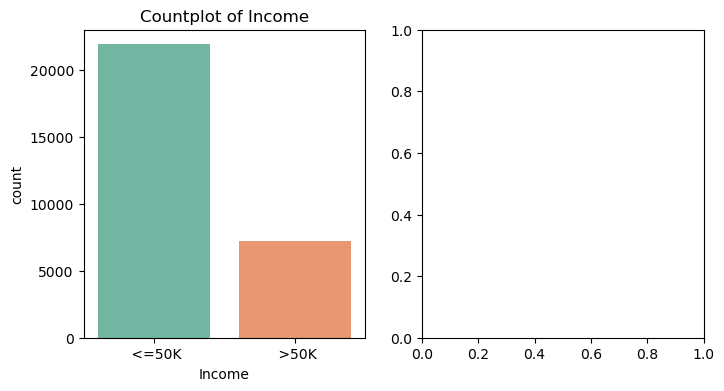

In [22]:
#visualise 'Income'

fig, axes= plt.subplots(1,2, figsize=(8,4))
#visualise coutplot
sns.countplot(x=t,data=df, ax=axes[0],palette=('Set2'))
axes[0].set_title(f'Countplot of {t}')
                        
#visuallise piechart
#axes[1].pie(df[t].value_counts(), labels=df[t].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
#axes[1].set_title(f'Pie chart of {t}')              
#plt.tight_layout()                        
#plt.show()

- The data for the target variabe is unbalanced. 
- '<=50k' is much higher tha '>50k'

    -THIS WILL NEED ADDRESSING LATER TO FIX IMBALANCED

 <div style= 'color: blue;  padding :10px;'> <h2> Independant variables</h2>  </div>

 <div style= 'color: orange;  padding :10px;'> <h3> Categorical Columns</h3>  </div>

 <div style= 'color: Blue;  padding :10px;'> <h4> Workclass</h4>  </div>

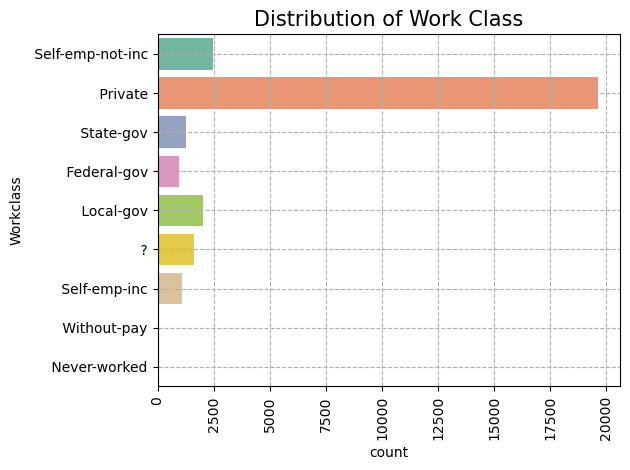

In [23]:
sns.countplot(y='Workclass', data=df, palette='Set2') 
plt.title(f'Distribution of Work Class', fontsize=15)
plt.xticks(rotation=90)
plt.grid(which='both', linestyle='--')

plt.tight_layout()
plt.show()

In [24]:
df['Workclass'].value_counts(normalize=True)*100

 Private             67.437704
 Self-emp-not-inc     8.499742
 Local-gov            7.011514
 ?                    5.609211
 State-gov            4.368448
 Self-emp-inc         3.749785
 Federal-gov          3.251418
 Without-pay          0.048118
 Never-worked         0.024059
Name: Workclass, dtype: float64

workclass 
- most classes of work seem to have a distribution within a specific range(between 2.9% - 7.9% ) except for private
- private takes the majority (69.7%)
- ? is (5.6%) --- This needs to be imputed 
- never work and not paid are both less than 1% collectively.

action 
- change ? to mode 

In [25]:
mode_value = df['Workclass'].mode()[0]
df.loc[df['Workclass'] ==' ?', 'Workclass'] = mode_value


In [26]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

<Axes: xlabel='count', ylabel='Workclass'>

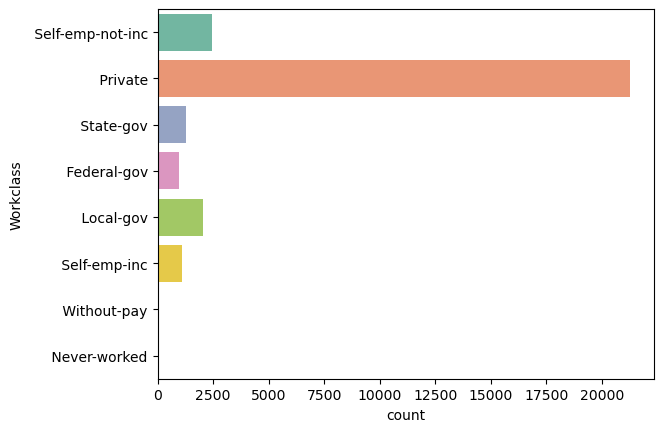

In [27]:
sns.countplot(y='Workclass', data=df, palette='Set2') 

___________________

 <div style= 'color: Blue;  padding :10px;'> <h4> Education</h4>  </div>

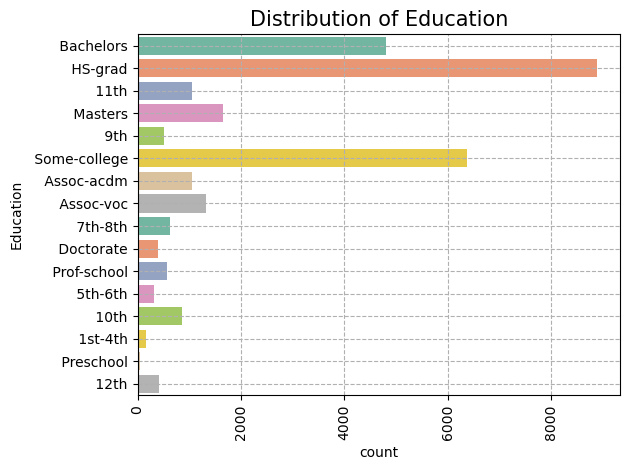

In [28]:
sns.countplot(y='Education', data=df, palette='Set2') 
plt.title(f'Distribution of Education', fontsize=15)
plt.xticks(rotation=90)
plt.grid(which='both', linestyle='--')

plt.tight_layout()
plt.show()

Education
- HS-grad is the most common (32.3%), making up around a third of the distribution, followed by Some-college (22.4%)
- as this is a category of education, the order is important, so i will order it to visually see the proportions better
- also there seems to be too many seperate categories, which collectively could represent one. 

action 
- fix order
- combine categories

In [29]:
df['Education'].value_counts(normalize=True)*100

 HS-grad         30.541330
 Some-college    21.921292
 Bachelors       16.528613
 Masters          5.681389
 Assoc-voc        4.574669
 11th             3.629490
 Assoc-acdm       3.619179
 10th             2.979893
 7th-8th          2.161883
 Prof-school      1.945351
 9th              1.742567
 12th             1.422925
 Doctorate        1.381681
 5th-6th          1.127341
 1st-4th          0.570545
 Preschool        0.171851
Name: Education, dtype: float64

 <div style= 'color: Blue;  padding :10px;'> <h4>Combine Categories</h4>  </div>

In [30]:
#strip
df['Education']=df['Education'].str.strip()
#cat_map - education 
cat_map_edu={
    'Preschool':'Below HS',
    '1st-4th' : 'Below HS',
    '5th-6th': 'Below HS',
    '7th-8th': 'Below HS',
    '9th': 'Below HS',
    '10th': 'Below HS',
    '11th': 'Below HS',
    '12th': 'Below HS',
    'HS-grad': 'HS-graduate',
    'Some-college':'Some-college',
    'Bachelors': 'Graduate',
    'Assoc-voc': 'Associate',
    'Assoc-acdm':'Associate',
    'Masters':'Post-graduate',
    'Prof-school':'Post-graduate',
    'Doctorate':'Post-graduate'
    
}
col_ed='Education' 
df['Education_or']= df[col_ed]

df[col_ed]=df[col_ed].replace(cat_map_edu)

df['Education'].unique()


 #as the order is now corrected, i will continue and put together the correct categories. as there are many minute ones. 


array(['Graduate', 'HS-graduate', 'Below HS', 'Post-graduate',
       'Some-college', 'Associate'], dtype=object)

 <div style= 'color: Blue;  padding :10px;'> <h4> Fix Order</h4>  </div>

In [31]:
edu_ord= ['Below HS', 'HS-graduate', 'Some-college', 'Associate', 'Graduate',  'Post-graduate']

#
df['Education']=pd.Categorical(df['Education'], categories=edu_ord, ordered=True)

#check
df['Education'].unique()


['Graduate', 'HS-graduate', 'Below HS', 'Post-graduate', 'Some-college', 'Associate']
Categories (6, object): ['Below HS' < 'HS-graduate' < 'Some-college' < 'Associate' < 'Graduate' < 'Post-graduate']

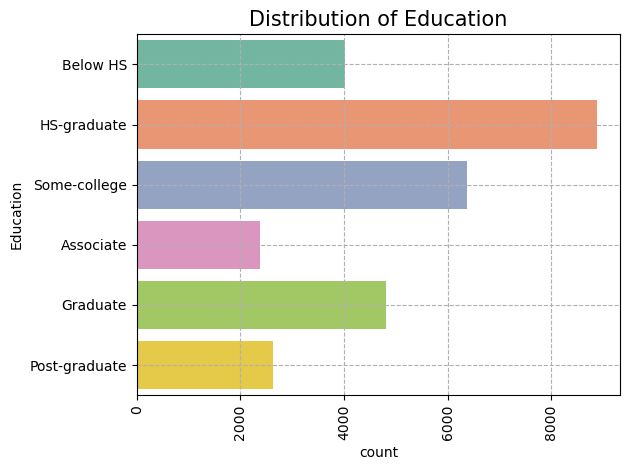

In [32]:
sns.countplot(y='Education', data=df, palette='Set2') 
plt.title(f'Distribution of Education', fontsize=15)
plt.xticks(rotation=90)
plt.grid(which='both', linestyle='--')

plt.tight_layout()
plt.show()

In [33]:
df['Education'].value_counts()

HS-graduate      8886
Some-college     6378
Graduate         4809
Below HS         4017
Post-graduate    2621
Associate        2384
Name: Education, dtype: int64

- the columns are now more suitable and easier to analyze 

In [34]:
#remove Restaurant ID from dataframe
df.drop(columns=['Education_or'], axis=1, inplace=True)
df.shape  

(29095, 14)

_______________

 <div style= 'color: Blue;  padding :10px;'> <h4> Marital Status</h4>  </div>

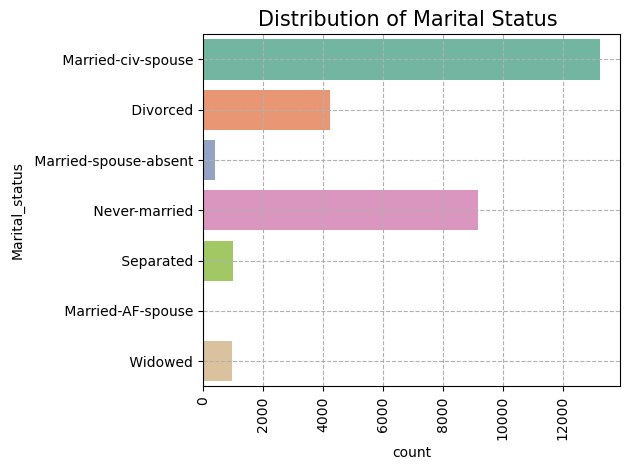

In [35]:
sns.countplot(y='Marital_status', data=df, palette='Set2') 
plt.title(f'Distribution of Marital Status ', fontsize=15)
plt.xticks(rotation=90)
plt.grid(which='both', linestyle='--')

plt.tight_layout()
plt.show()

In [36]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

Marital Status
- almost half (46%) of the distribution goes to Married-civ-spouse
- married-spouse absent and married-AF-spouse are very similar and i think dont have any signficance in this study to be seperated 
- 
action 
- map similar items in one for better analyzing 

In [37]:
df['Marital_status']=df['Marital_status'].replace([' Married-civ-spouse', ' Married-AF-spouse'], 'Married')
df['Marital_status']=df['Marital_status'].replace([' Never-married'], 'Not-married')
df['Marital_status']=df['Marital_status'].replace([' Divorced', ' Seperated', ' Widowed', ' Married-spouse-absent'], 'Other')

<Axes: xlabel='count', ylabel='Marital_status'>

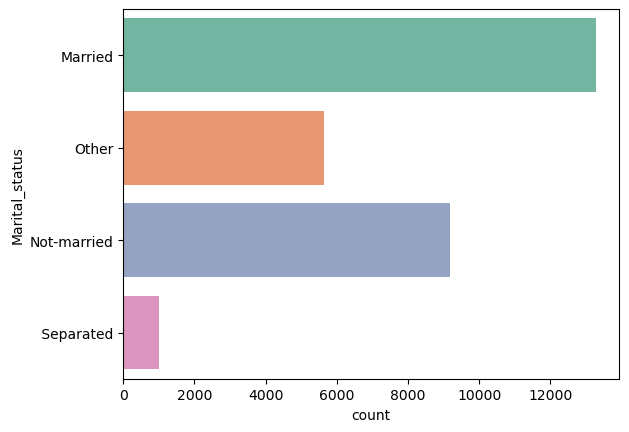

In [38]:
sns.countplot(y='Marital_status', data=df, palette='Set2') 

 <div style= 'color: Blue;  padding :10px;'> <h4>Occupation</h4>  </div>

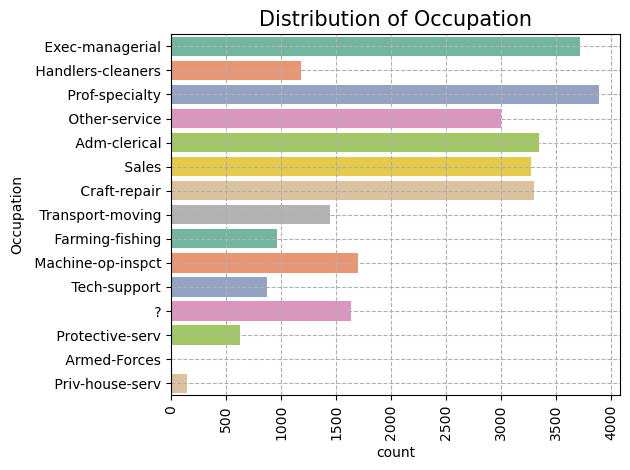

In [39]:
sns.countplot(y='Occupation', data=df, palette='Set2') 
plt.title(f'Distribution of Occupation', fontsize=15)
plt.xticks(rotation=90)
plt.grid(which='both', linestyle='--')

plt.tight_layout()
plt.show()

In [40]:
df['Occupation'].value_counts(normalize=True)*100

 Prof-specialty       13.352810
 Exec-managerial      12.782265
 Adm-clerical         11.476199
 Craft-repair         11.335281
 Sales                11.239045
 Other-service        10.297302
 Machine-op-inspct     5.849802
 ?                     5.633270
 Transport-moving      4.966489
 Handlers-cleaners     4.052243
 Farming-fishing       3.306410
 Tech-support          3.003953
 Protective-serv       2.168758
 Priv-house-serv       0.505241
 Armed-Forces          0.030933
Name: Occupation, dtype: float64

occupation
- most.

action 


In [41]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [42]:
df['Occupation'].mode()[0]
df['Occupation'] = df['Occupation'].replace(' ?', ' Prof-specialty')


<Axes: xlabel='count', ylabel='Occupation'>

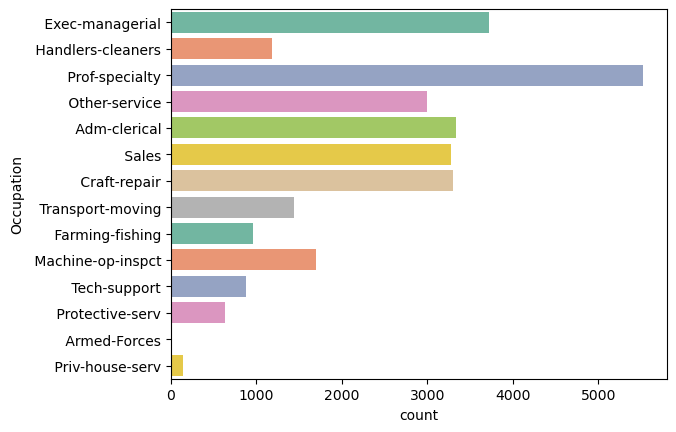

In [43]:
sns.countplot(y='Occupation', data=df, palette='Set2') 

________________________

 <div style= 'color: Blue;  padding :10px;'> <h4>Relationship</h4>  </div>

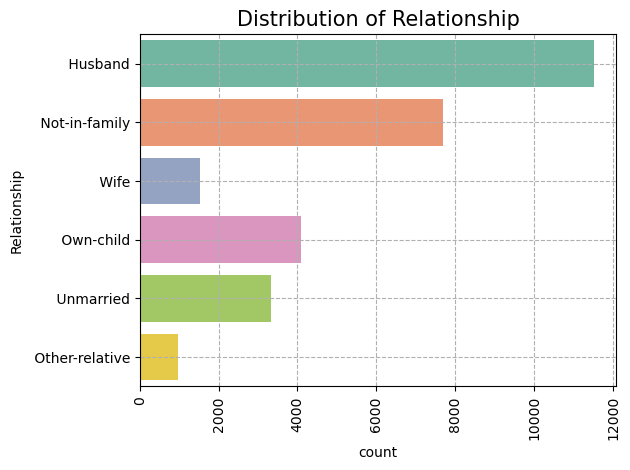

In [44]:
sns.countplot(y='Relationship', data=df, palette='Set2') 
plt.title(f'Distribution of Relationship', fontsize=15)
plt.xticks(rotation=90)
plt.grid(which='both', linestyle='--')

plt.tight_layout()
plt.show()

In [45]:
df['Relationship'].value_counts(normalize=True)*100

 Husband           39.546314
 Not-in-family     26.406599
 Own-child         14.078020
 Unmarried         11.400584
 Wife               5.251761
 Other-relative     3.316721
Name: Relationship, dtype: float64

Relationship
- majority of distribution goes to husband(40.5%)

action 


 <div style= 'color: Blue;  padding :10px;'> <h4>Sex</h4>  </div>

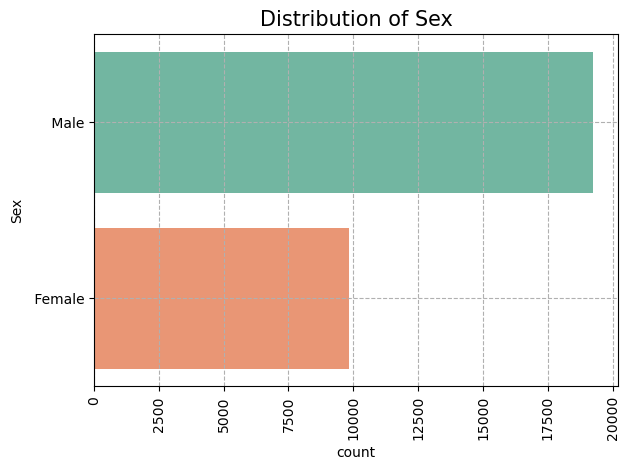

In [46]:
sns.countplot(y='Sex', data=df, palette='Set2') 
plt.title(f'Distribution of Sex', fontsize=15)
plt.xticks(rotation=90)
plt.grid(which='both', linestyle='--')

plt.tight_layout()
plt.show()

In [47]:
df['Sex'].value_counts(normalize=True)*100

 Male      66.145386
 Female    33.854614
Name: Sex, dtype: float64

Relationship
- majority of distribution goes to male(67%)

action 



<div style= 'color: Blue;  padding :10px;'> <h4>Race</h4>  </div>

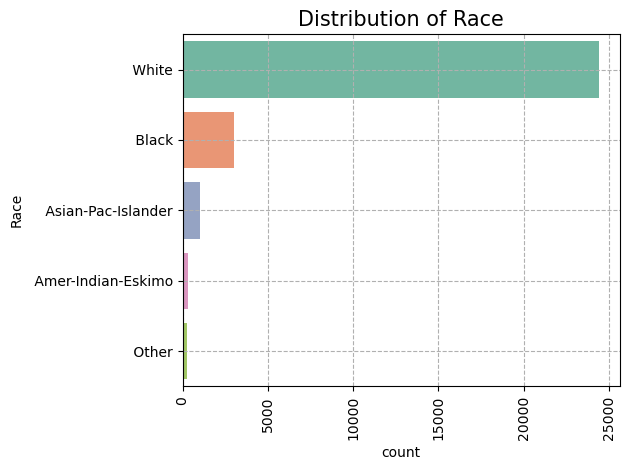

In [48]:
sns.countplot(y='Race', data=df, palette='Set2') 
plt.title(f'Distribution of Race', fontsize=15)
plt.xticks(rotation=90)
plt.grid(which='both', linestyle='--')

plt.tight_layout()
plt.show()

In [49]:
df['Race'].value_counts(normalize=True)*100

 White                 83.990376
 Black                 10.441657
 Asian-Pac-Islander     3.567623
 Amer-Indian-Eskimo     1.068912
 Other                  0.931432
Name: Race, dtype: float64

Race
- majority of distribution goes to white(85.54%), with black 9.6%
- the rest of the minorities are less than 5% of the total
action 


________________

 <div style= 'color: Blue;  padding :10px;'> <h4>Native_country</h4>  </div>

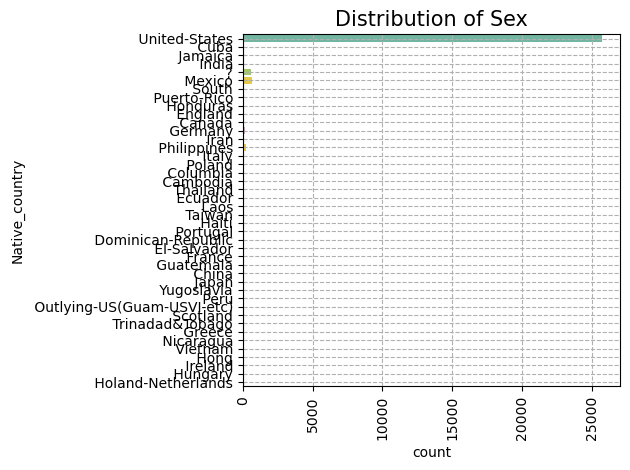

In [50]:
sns.countplot(y='Native_country', data=df, palette='Set2') 
plt.title(f'Distribution of Sex', fontsize=15)
plt.xticks(rotation=90)
plt.grid(which='both', linestyle='--')

plt.tight_layout()
plt.show()

In [51]:
df['Native_country'].value_counts(normalize=True)*100

 United-States                 88.400069
 Mexico                         2.175632
 ?                              1.993470
 Philippines                    0.680529
 Germany                        0.470871
 Canada                         0.415879
 Puerto-Rico                    0.391820
 El-Salvador                    0.364324
 India                          0.343702
 Cuba                           0.326517
 England                        0.309332
 Jamaica                        0.278398
 South                          0.274961
 China                          0.257776
 Italy                          0.250902
 Dominican-Republic             0.240591
 Vietnam                        0.230280
 Japan                          0.213095
 Guatemala                      0.213095
 Poland                         0.206221
 Columbia                       0.202784
 Taiwan                         0.175288
 Haiti                          0.151229
 Iran                           0.147792
 Portugal       

Native_country
- major imbalance of distribution goes to United States(89%)

________________________

___________________________

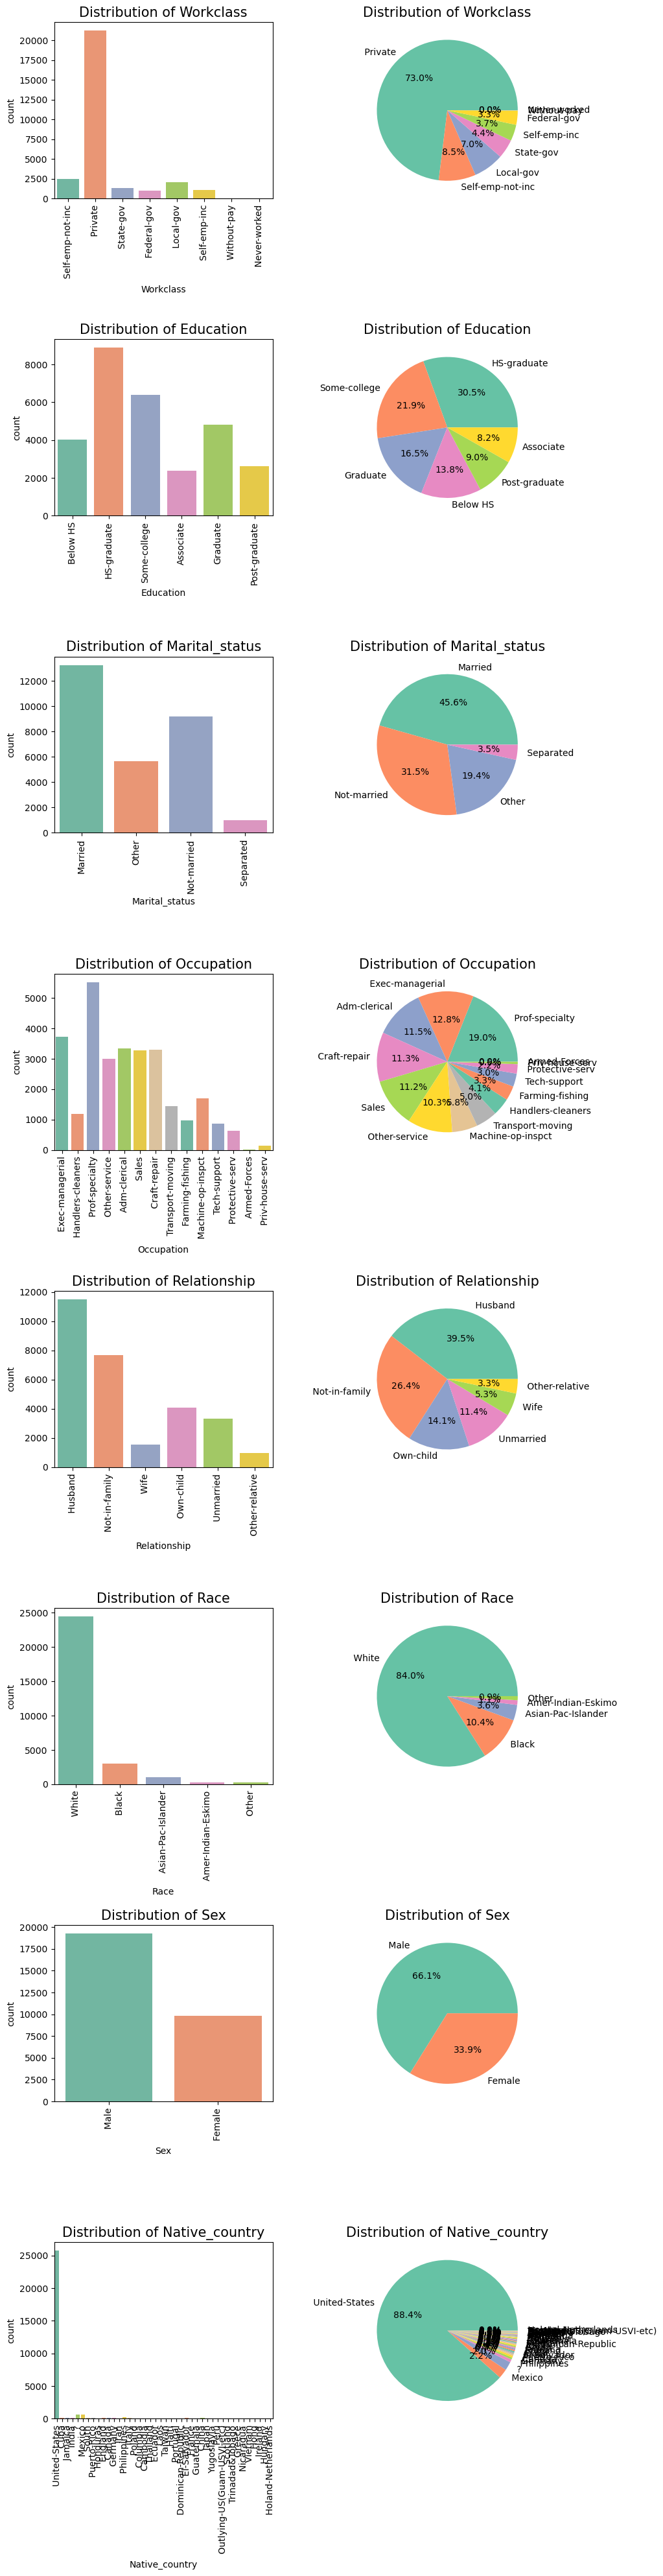

In [52]:
plt.figure(figsize=(10, len(cat_cols)*6))

for i, col in enumerate(cat_cols,1):
    plt.subplot(len(cat_cols),2,2*i-1)       
    sns.countplot(x=col, data=df, palette='Set2') 
    plt.title(f'Distribution of {col}', fontsize=15)
    plt.xticks(rotation=90)
    
    plt.subplot(len(cat_cols),2,2*i)    
    val_count=df[col].value_counts()
    plt.pie(val_count, labels=val_count.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f'Distribution of {col}', fontsize=15)
    plt.xticks(rotation=90, fontsize=14)

plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()



In [53]:
################################

 <div style= 'color: orange;  padding :10px;'> <h3> Numerical Columns</h3>  </div>

 <div style= 'color: blue;  padding :10px;'> <h3>Value counts </h3>  </div>

In [54]:
for col in num_cols:
    print(f'\n Value counts for {col}:')
    print(df[col].value_counts())
    print()


 Value counts for Age:
31    806
36    802
34    791
33    785
28    782
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Value counts for Education_num:
9     8886
10    6378
13    4809
14    1653
11    1331
7     1056
12    1053
6      867
4      629
15     566
5      507
8      414
16     402
3      328
2      166
1       50
Name: Education_num, dtype: int64


 Value counts for Capital_gain:
0        26398
15024      341
7688       280
7298       244
99999      158
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64


 Value counts for Capital_loss:
0       27584
1902      202
1977      166
1887      157
1485       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64


 Value counts for Hours_per_week:
40    12689
50     2604
45     1713
60     1413
35     1239
      ...  

 <div style= 'color: blue;  padding :10px;'> <h3>Histograms </h3>  </div>

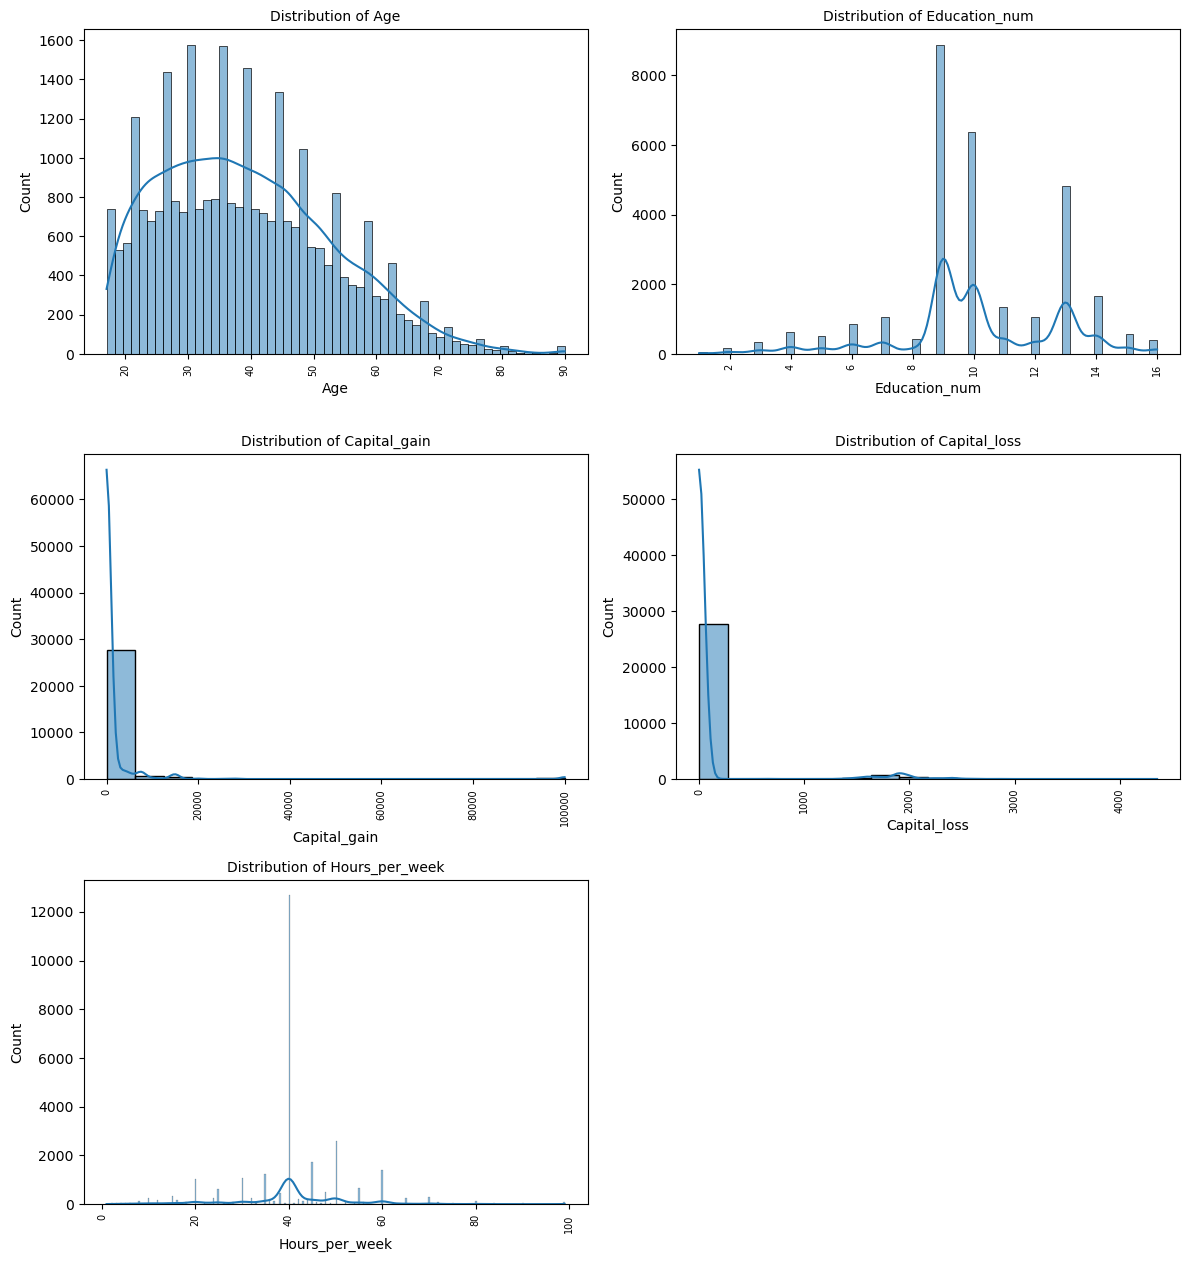

In [55]:
# plot countplots for numerical columns
plt.figure(figsize=(12, 25))

for i, col in enumerate(num_cols,1):
    plt.subplot(6,2,i)
    sns.histplot(df[col], kde=True, palette='Set2') 
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xticks(rotation=90, fontsize=7)

plt.tight_layout()
plt.show()

 <div style= 'color: blue;  padding :10px;'> <h3> Univariate box plot</h3>  </div>

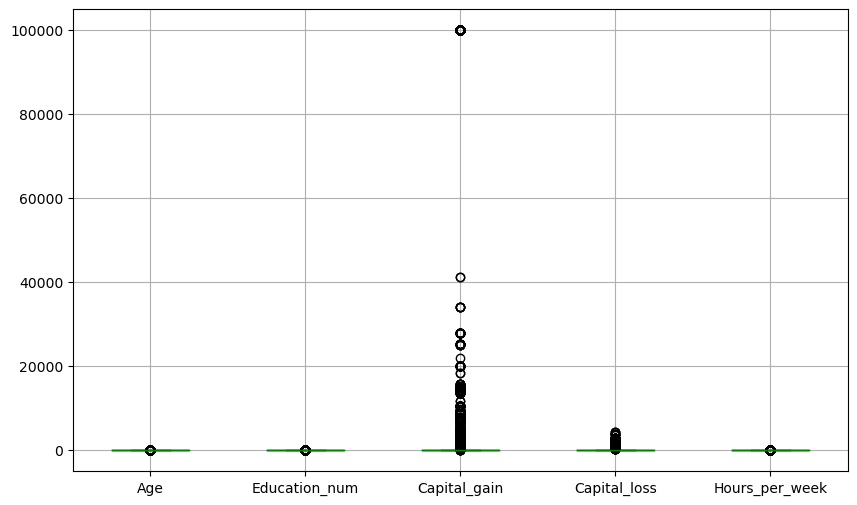

In [56]:
plt.figure(figsize=(10,6))
df.boxplot(column=num_cols, figsize=(10,10), color='green')
plt.show()


this confirms the outliers in each feature. 

##########################################

 <div style= 'background-color: orange; color: blue;  padding :10px;'> <h1>Bivariate Analysis  </h1>  </div>

 <div style= 'color: orange;  padding :10px;'> <h3> Categorical </h3>  </div>

In [57]:
cat_cols

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country']

 <div style= 'color: orange;  padding :10px;'> <h3> Target vs Workclass</h3>  </div>

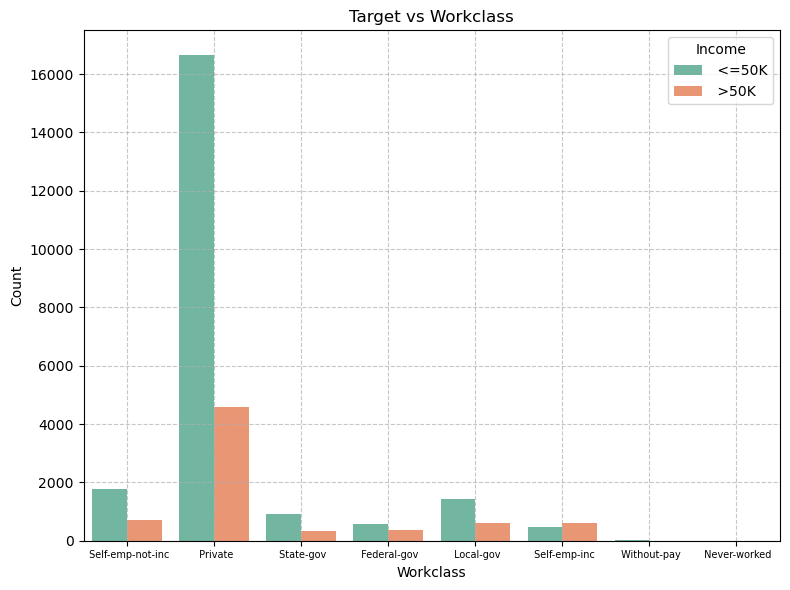

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
Income,,,,,,,,
<=50K,584,1439,7,16667,486,1765,923,14
>50K,362,601,0,4586,605,708,348,0


In [58]:
# create plot of age against target
plt.figure(figsize=(8,6))

sns.countplot(x='Workclass', hue=t,data=df, palette='Set2')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Target vs Workclass')
plt.xticks(rotation=0, fontsize=7)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#crosstab
pd.crosstab(df['Income'], df['Workclass'])


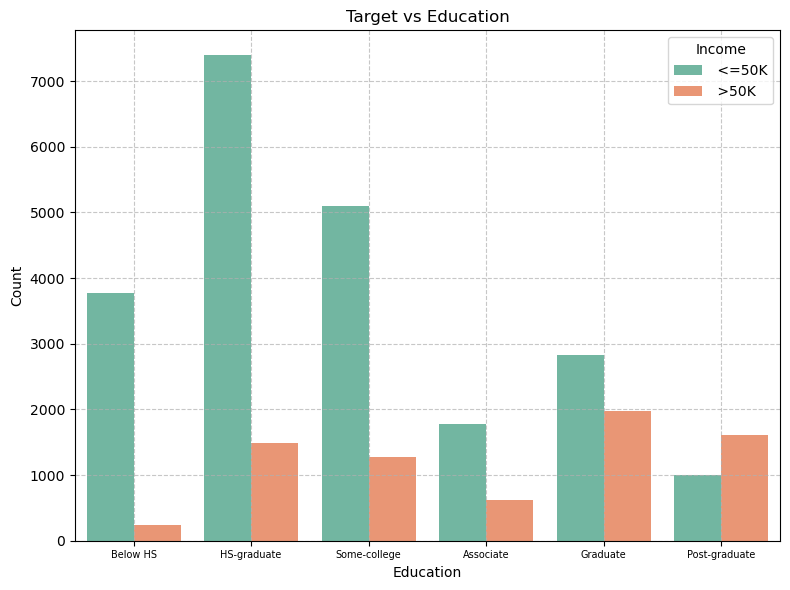

Education,Below HS,HS-graduate,Some-college,Associate,Graduate,Post-graduate
Income,,,,,,
<=50K,3776,7402,5102,1770,2828,1007
>50K,241,1484,1276,614,1981,1614


In [59]:


# create plot of age against target
plt.figure(figsize=(8,6))

sns.countplot(x='Education', hue=t,data=df, palette='Set2')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Target vs Education')
plt.xticks(rotation=0, fontsize=7)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#crosstab
pd.crosstab(df['Income'], df['Education'])


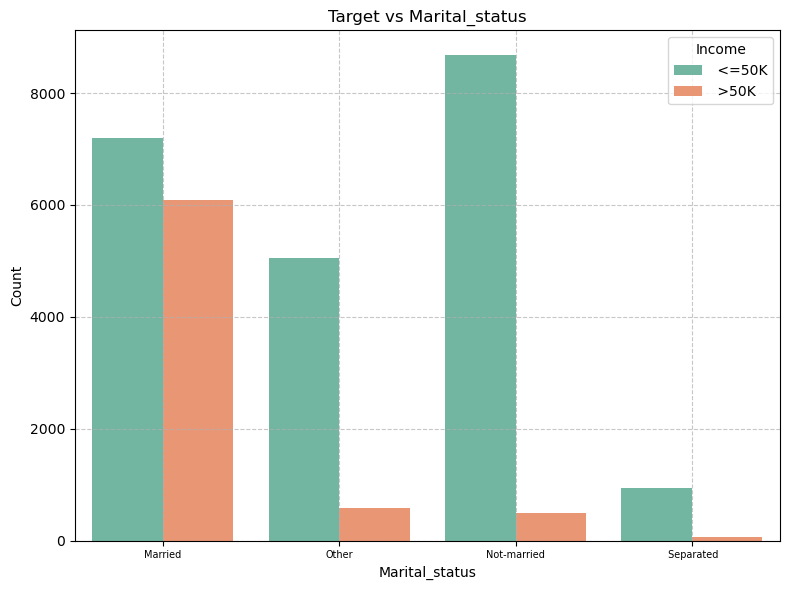

Marital_status,Separated,Married,Not-married,Other
Income,,,,
<=50K,948,7191,8687,5059
>50K,66,6081,485,578


In [60]:
# create plot of age against target
plt.figure(figsize=(8,6))

sns.countplot(x='Marital_status', hue=t,data=df, palette='Set2')
plt.xlabel('Marital_status')
plt.ylabel('Count')
plt.title('Target vs Marital_status')
plt.xticks(rotation=0, fontsize=7)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#crosstab
pd.crosstab(df['Income'], df['Marital_status'])

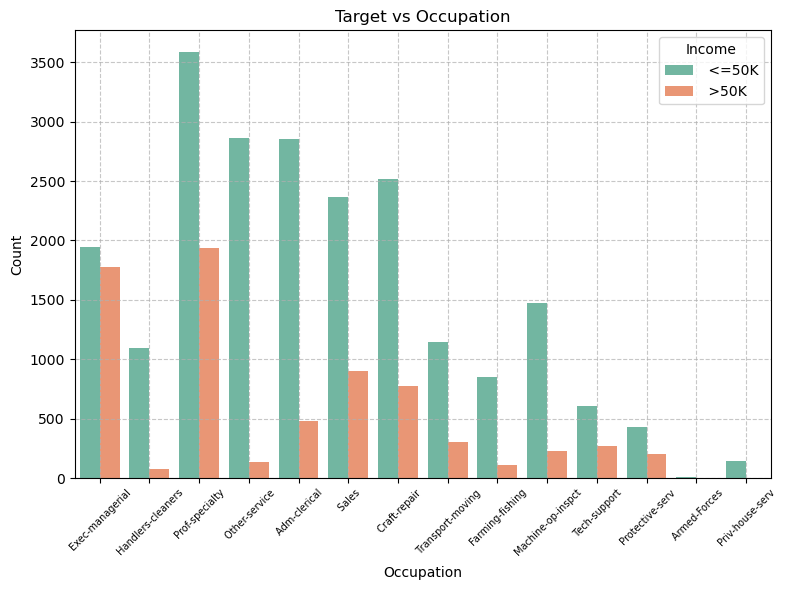

Occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
Income,,,,,,,,,,,,,,
<=50K,2855,8,2520,1946,848,1098,1474,2859,146,3589,428,2367,605,1142
>50K,484,1,778,1773,114,81,228,137,1,1935,203,903,269,303


In [61]:
# create plot of age against target
plt.figure(figsize=(8,6))

sns.countplot(x='Occupation', hue=t,data=df, palette='Set2')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Target vs Occupation')
plt.xticks(rotation=45, fontsize=7)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#crosstab
pd.crosstab(df['Income'], df['Occupation'])

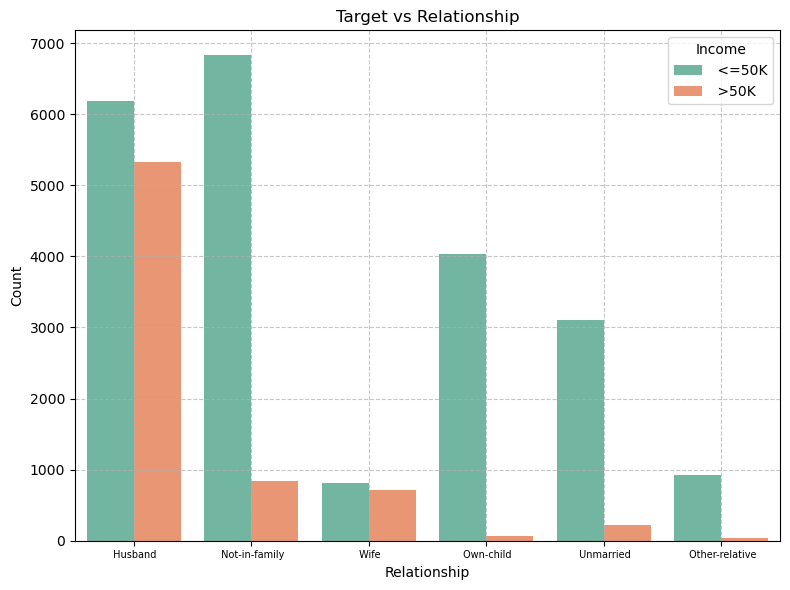

Relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
Income,,,,,,
<=50K,6184,6837,928,4029,3099,808
>50K,5322,846,37,67,218,720


In [62]:
# create plot of age against target
plt.figure(figsize=(8,6))

sns.countplot(x='Relationship', hue=t,data=df, palette='Set2')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.title('Target vs Relationship')
plt.xticks(rotation=0, fontsize=7)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#crosstab
pd.crosstab(df['Income'], df['Relationship'])

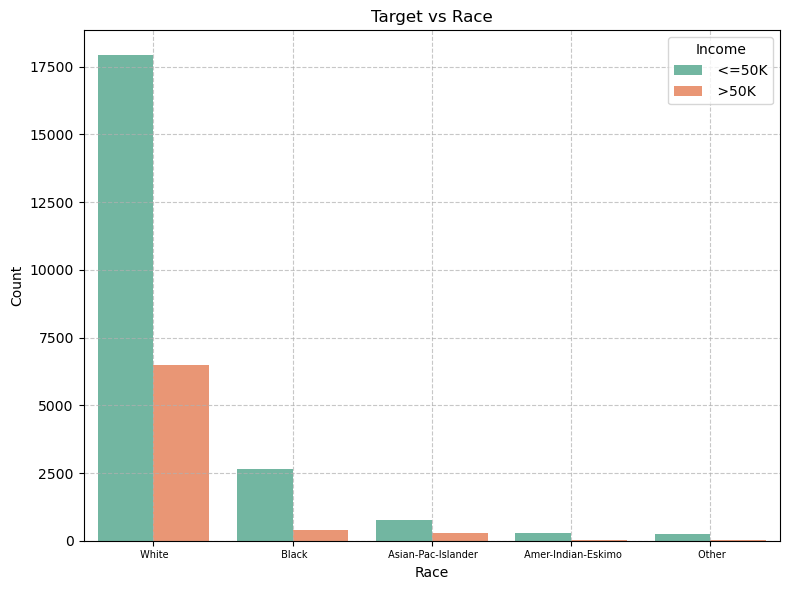

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
Income,,,,,
<=50K,275,762,2654,246,17948
>50K,36,276,384,25,6489


In [63]:
# create plot of race against target
plt.figure(figsize=(8,6))

sns.countplot(x='Race', hue=t,data=df, palette='Set2')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Target vs Race')
plt.xticks(rotation=0, fontsize=7)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#crosstab
pd.crosstab(df['Income'], df['Race'])

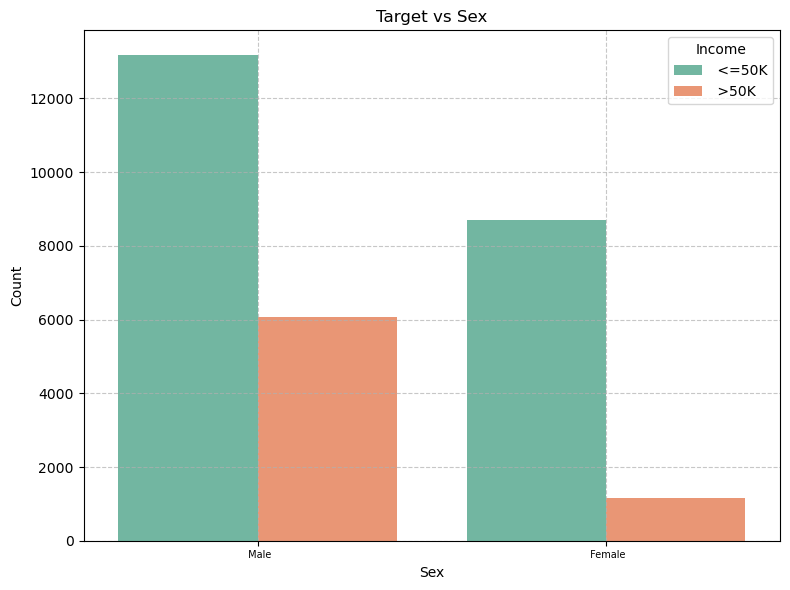

Sex,Female,Male
Income,,
<=50K,8698,13187
>50K,1152,6058


In [64]:
# create plot of age against target
plt.figure(figsize=(8,6))

sns.countplot(x='Sex', hue=t,data=df, palette='Set2')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Target vs Sex')
plt.xticks(rotation=0, fontsize=7)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#crosstab
pd.crosstab(df['Income'], df['Sex'])

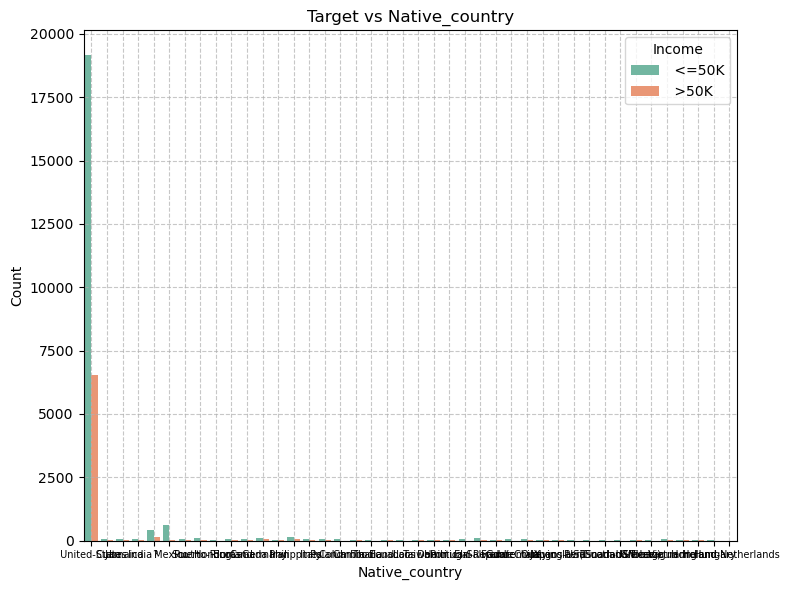

Native_country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
Income,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
<=50K,435,12,82,55,57,70,68,24,97,60,17,93,21,59,40,1,12,14,10,60,25,18,48,71,38,16,600,32,14,29,137,48,33,102,9,64,31,15,17,19179,62,10
>50K,145,7,39,20,2,25,2,4,9,30,12,44,8,3,4,0,1,6,3,40,18,5,25,10,24,2,33,2,0,2,61,12,4,12,3,16,20,3,2,6541,5,6


In [65]:
# create plot of age against target
plt.figure(figsize=(8,6))

sns.countplot(x='Native_country', hue=t,data=df, palette='Set2')
plt.xlabel('Native_country')
plt.ylabel('Count')
plt.title('Target vs Native_country')
plt.xticks(rotation=0, fontsize=7)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#crosstab
pd.crosstab(df['Income'], df['Native_country'])

 <div style= 'color: orange;  padding :10px;'> <h3> Numerical </h3>  </div>

In [66]:
num_cols

['Age', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

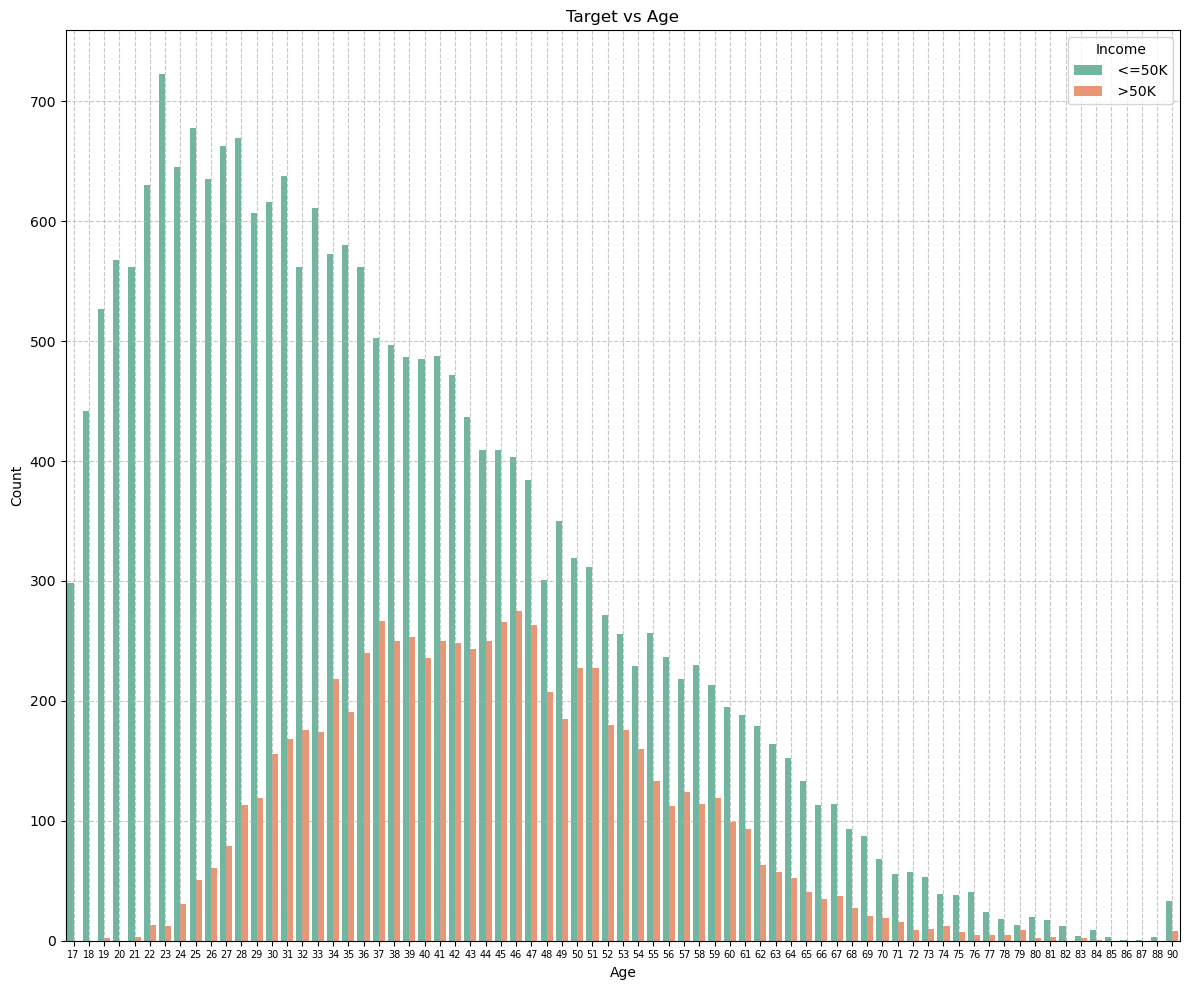

In [67]:
# create plot of age against target
plt.figure(figsize=(12,10))

sns.countplot(x='Age', hue=t,data=df, palette='Set2')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Target vs Age')
plt.xticks(rotation=0, fontsize=7)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- Income more than 50k has a very different pattern to that of less thank 50k. 
- <50k is skewed to the right  where as >50k seems th have  a somewhat normal distribution.
- i will now group the ages i###############################################

In [68]:
df['Income']=df['Income'].map ({' <=50K':0, ' >50K':1})

 <div style= 'color: orange;  padding :10px;'> <h3> Target vs Capital gain</h3>  </div>

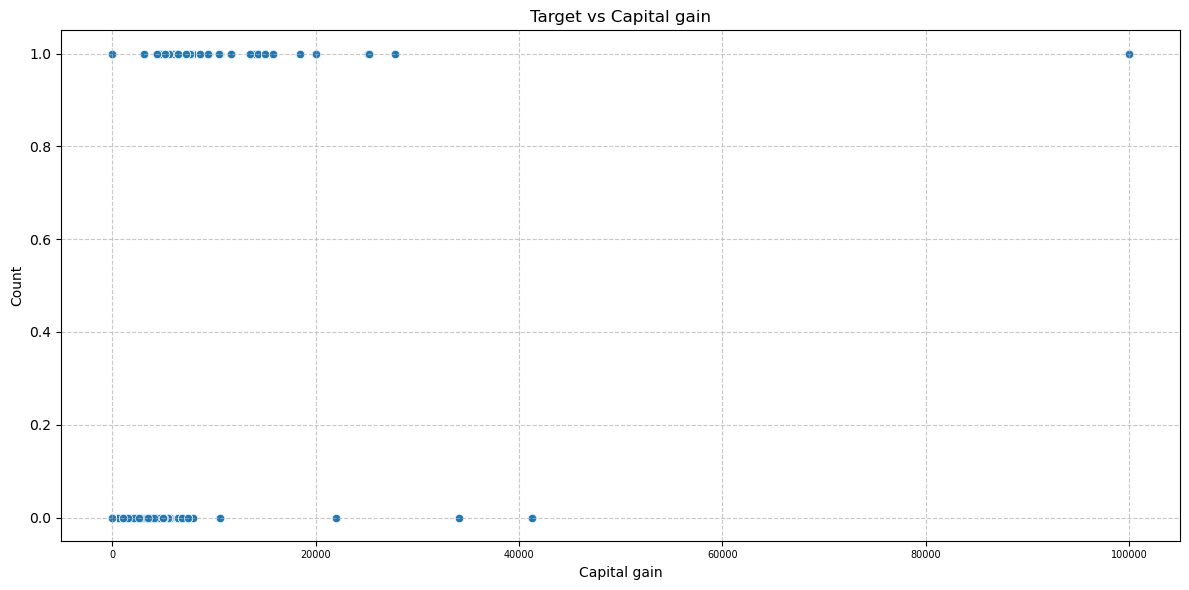

In [69]:
# create plot of 
plt.figure(figsize=(12,6))

sns.scatterplot(x='Capital_gain', y=t,data=df, palette='Set2')
plt.xlabel('Capital gain')
plt.ylabel('Count')
plt.title('Target vs Capital gain')
plt.xticks(rotation=0, fontsize=7)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



 <div style= 'color: orange;  padding :10px;'> <h3> Target vs Capital Loss</h3>  </div>

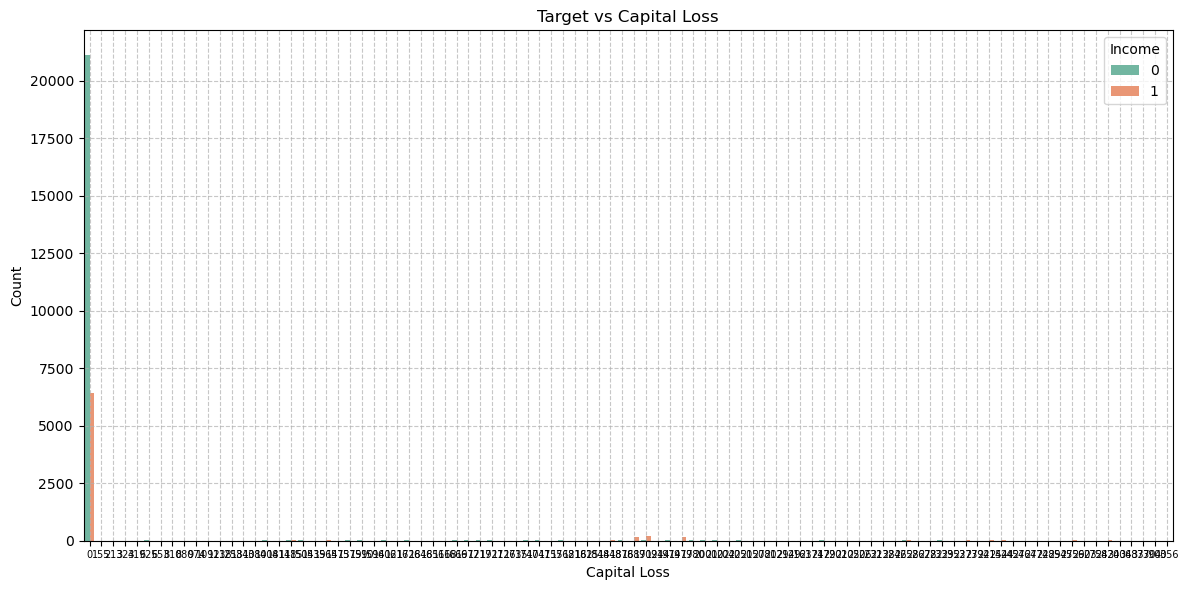

In [70]:
# create plot of 
plt.figure(figsize=(12,6))

sns.countplot(x='Capital_loss',hue=t, data=df, palette='Set2')
plt.xlabel('Capital Loss')
plt.ylabel('Count')
plt.title('Target vs Capital Loss')
plt.xticks(rotation=0, fontsize=7)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [71]:
#############################################################################################

 <div style= 'color: orange;  padding :10px;'> <h3> Target vs Hours Per Week</h3>  </div>

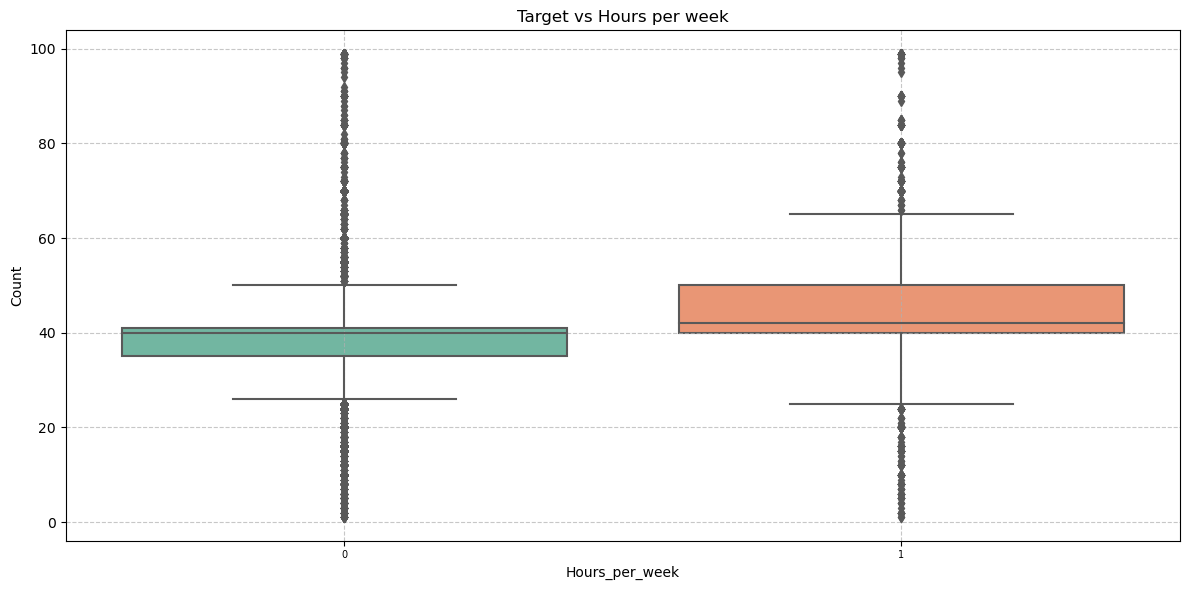

In [72]:
# create plot of 
plt.figure(figsize=(12,6))

sns.boxplot(x=t, y='Hours_per_week',data=df, palette='Set2')
plt.xlabel('Hours_per_week')
plt.ylabel('Count')
plt.title('Target vs Hours per week')
plt.xticks(rotation=0, fontsize=7)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

_________________

 <div style= 'color: green;  padding :10px;'> <h3> Multivariate analysis</h3>  </div>

In [73]:
#plt.figure(figsize=(35,15))
#sns.pairplot(df,hue=t, palette='inferno', diag_kind='kde',kind='reg', )
#plt.show()

 <div style= 'color: orange;  padding :10px;'> <h3> Encode Categorical </h3>  </div>

In [74]:
cat_cols

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country']

In [75]:
le=LabelEncoder()

#apply label encode 
df['Workclass']= le.fit_transform(df['Workclass'])
df['Education']= le.fit_transform(df['Education'])
df['Marital_status']= le.fit_transform(df['Marital_status'])
df['Occupation']= le.fit_transform(df['Occupation'])
df['Relationship']= le.fit_transform(df['Relationship'])
df['Race']= le.fit_transform(df['Race'])
df['Sex']= le.fit_transform(df['Sex'])
df['Native_country']= le.fit_transform(df['Native_country'])

df.head(15)

,Income,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
1,0,50,5,2,13,1,3,0,4,1,0,0,13,39
2,0,38,3,3,9,3,5,1,4,1,0,0,40,39
3,0,53,3,1,7,1,5,0,2,1,0,0,40,39
4,0,28,3,2,13,1,9,5,2,0,0,0,40,5
5,0,37,3,4,14,1,3,5,4,0,0,0,40,39
6,0,49,3,1,5,3,7,1,2,0,0,0,16,23
7,1,52,5,3,9,1,3,0,4,1,0,0,45,39
8,1,31,3,4,14,2,9,1,4,0,14084,0,50,39
9,1,42,3,2,13,1,3,0,4,1,5178,0,40,39
10,1,37,3,5,10,1,3,0,2,1,0,0,80,39


 <div style= 'color: orange;  padding :10px;'> <h3> Heatmap of Correlation</h3>  </div>

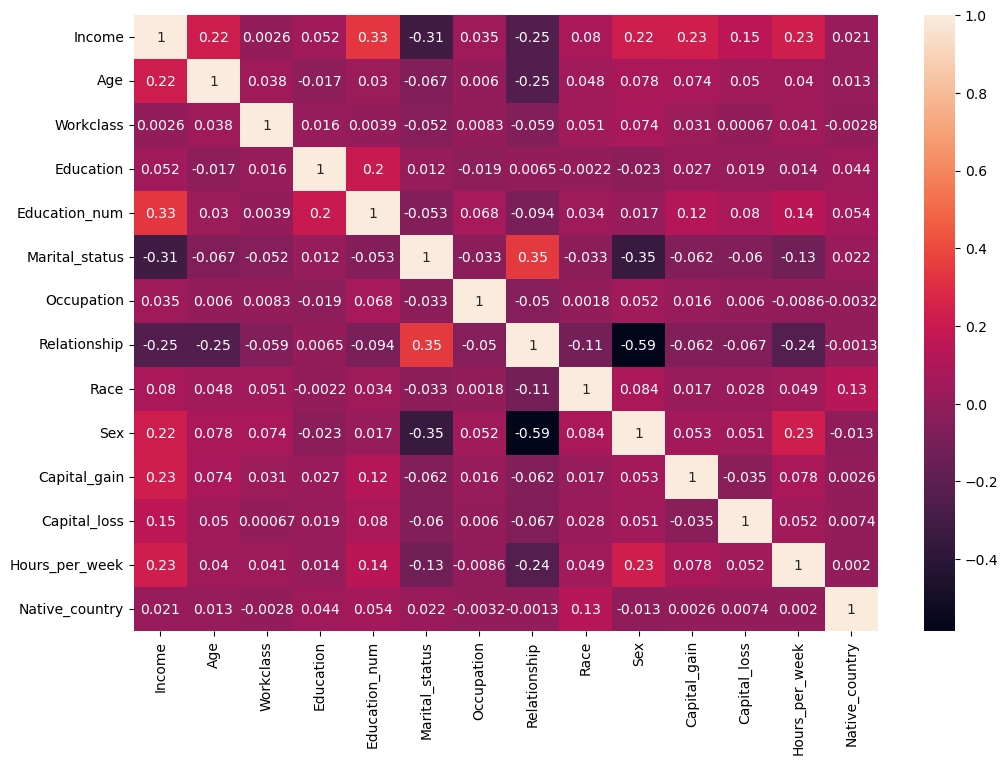

In [76]:
plt.figure(figsize=(12,8))
corr_=(df.corr())
sns.heatmap(corr_, annot=True)
plt.show()



In [77]:
# list of correlation to loan_Status

income_corr=corr_['Income']

income_df=income_corr.reset_index()
income_df.columns=['Feature', 'Income']

income_df=income_df.sort_values(by='Income', ascending=False)
income_df

,Feature,Income
0,Income,1.000000
4,Education_num,0.332240
10,Capital_gain,0.230700
12,Hours_per_week,0.226323
9,Sex,0.216833
1,Age,0.215271
11,Capital_loss,0.153273
8,Race,0.079835
3,Education,0.051699
6,Occupation,0.034734




<div style= 'color: green;  padding :10px;'> <h3> Identify/remove outliers</h3>  </div>

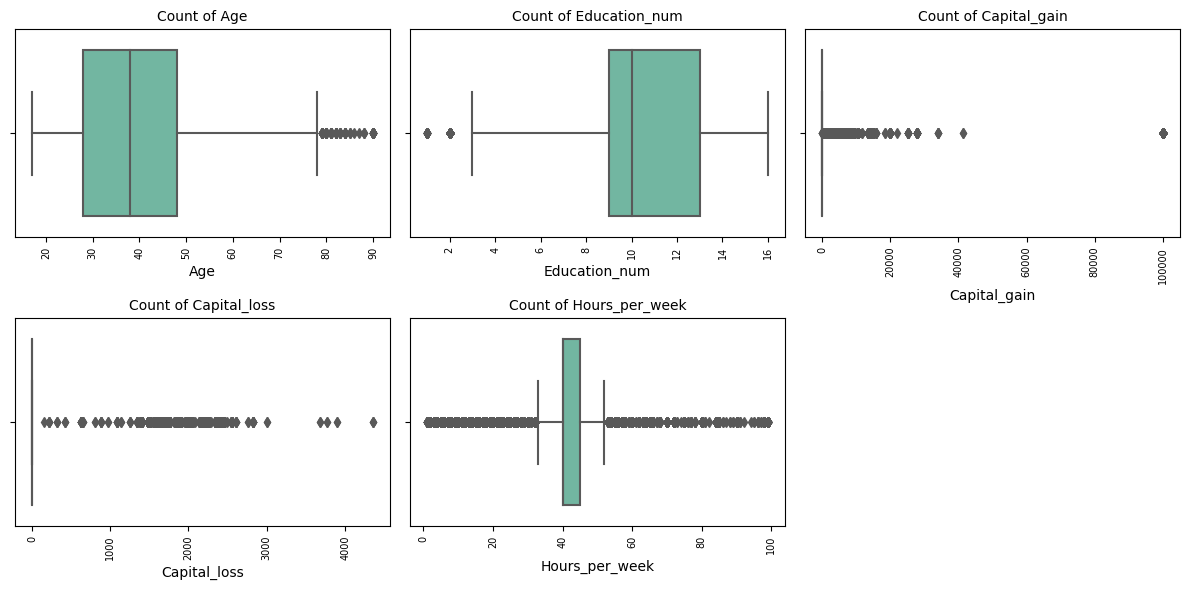

In [78]:

# plot countplots for numerical columns
plt.figure(figsize=(12, 6))

for i, col in enumerate(num_cols,1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[col], palette='Set2') 
    plt.title(f'Count of {col}', fontsize=10)
    plt.xticks(rotation=90, fontsize=7)

plt.tight_layout()
plt.show()

 <div style= 'color: green;  padding :10px;'> <h3>Z-score</h3>  </div>

In [79]:
#- Z score Method 

# calculate z-score 

z_scores= stats.zscore(df[num_cols])

df_zscore=np.abs(z_scores)

#define threshold 
threshold =3

#create df with no outliers 
df_in=df[(df_zscore < threshold).all(axis=1)]

print('The new dataframe without outliers:', df_in.shape)
print('Percentage of data loss', (df.shape[0]-df_in.shape[0])/df.shape[0]*100,'%')
df_in.sample(5)

The new dataframe without outliers: (26769, 14)
Percentage of data loss 7.994500773328752 %


,Income,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
31688,1,34,4,2,13,1,3,0,4,1,7688,0,55,39
3123,0,42,3,0,11,3,0,4,4,0,0,0,40,39
22046,1,58,4,3,9,1,11,0,4,1,0,0,55,39
22316,0,50,1,3,9,1,13,0,4,1,0,0,40,39
29299,0,39,5,3,9,1,4,0,4,1,0,0,60,39


 <div style= 'color: green;  padding :10px;'> <h3> Skewness</h3>  </div>

In [80]:
skew_cols=df_in[num_cols].select_dtypes(include=[np.number]).columns

In [81]:
skew_=df_in[skew_cols].skew()

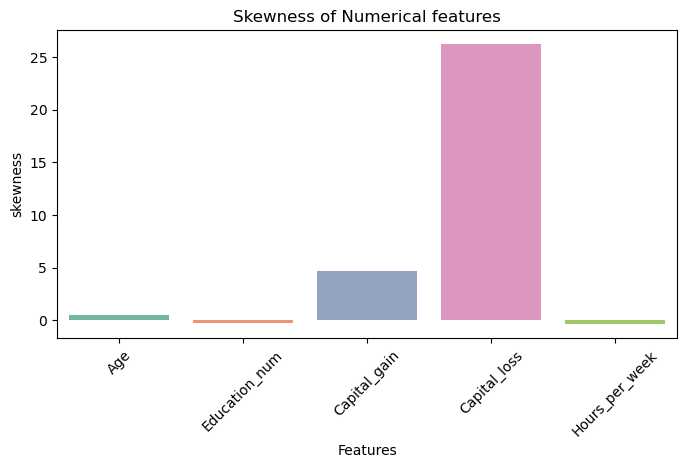

In [82]:
#
plt.figure(figsize=(8,4))
sns.barplot(x=skew_.index, y=skew_.values, palette='Set2')
plt.title('Skewness of Numerical features')
plt.xlabel('Features')
plt.ylabel('skewness')
plt.xticks(rotation=45)
plt.show()

In [83]:
skew_.sort_values().to_frame('Skew')

,Skew
Hours_per_week,-0.348045
Education_num,-0.216708
Age,0.484609
Capital_gain,4.641623
Capital_loss,26.217871


In [84]:
#
for col in skew_.index:
    if skew_[col] >0.5 or skew_[col] <-0.5 :
        print(f'Feature: {col}')
        
        #
        log_t=np.log1p(df_in[col])
        log_skew=log_t.skew()
        print(f'Log transform skewness = {log_skew}')
        
        #
        sqrt_t=np.sqrt(df_in[col].replace(0,np.nan))
        sqrt_skew=sqrt_t.skew()
        print(f'Square root skewness = {sqrt_skew}')
        
        #
        cbrt_t=np.cbrt(df_in[col])
        cbrt_skew=cbrt_t.skew()
        print(f'Cube root skewness = {cbrt_skew}')
        
        #  
        most_suit= min(
            [('Log Transform', log_skew),
             ('Square Root Transform', sqrt_skew),
             ('Cube Root Transform', cbrt_skew)],
        key=lambda x: abs(x[1])
        )
        
        print(f'\n Most suitable Transformation is {most_suit[0]} with skewness {most_suit[1]}')
        
     
        print('_'*30)



Feature: Capital_gain
Log transform skewness = 2.891175746016063
Square root skewness = 0.3065702277385102
Cube root skewness = 3.138433359047443

 Most suitable Transformation is Square Root Transform with skewness 0.3065702277385102
______________________________
Feature: Capital_loss
Log transform skewness = 22.015133010576058
Square root skewness = -0.5317857227223485
Cube root skewness = 22.62915120215332

 Most suitable Transformation is Square Root Transform with skewness -0.5317857227223485
______________________________


In [85]:
#squareroot
df_in['Capital_gain']=np.sqrt(df_in['Capital_gain'].replace(0,np.nan))
df_in['Capital_loss']=np.sqrt(df_in['Capital_loss'].replace(0,np.nan))

print(df_in['Capital_gain'].skew())
print(df_in['Capital_loss'].skew())

0.3065702277385102
-0.5317857227223485


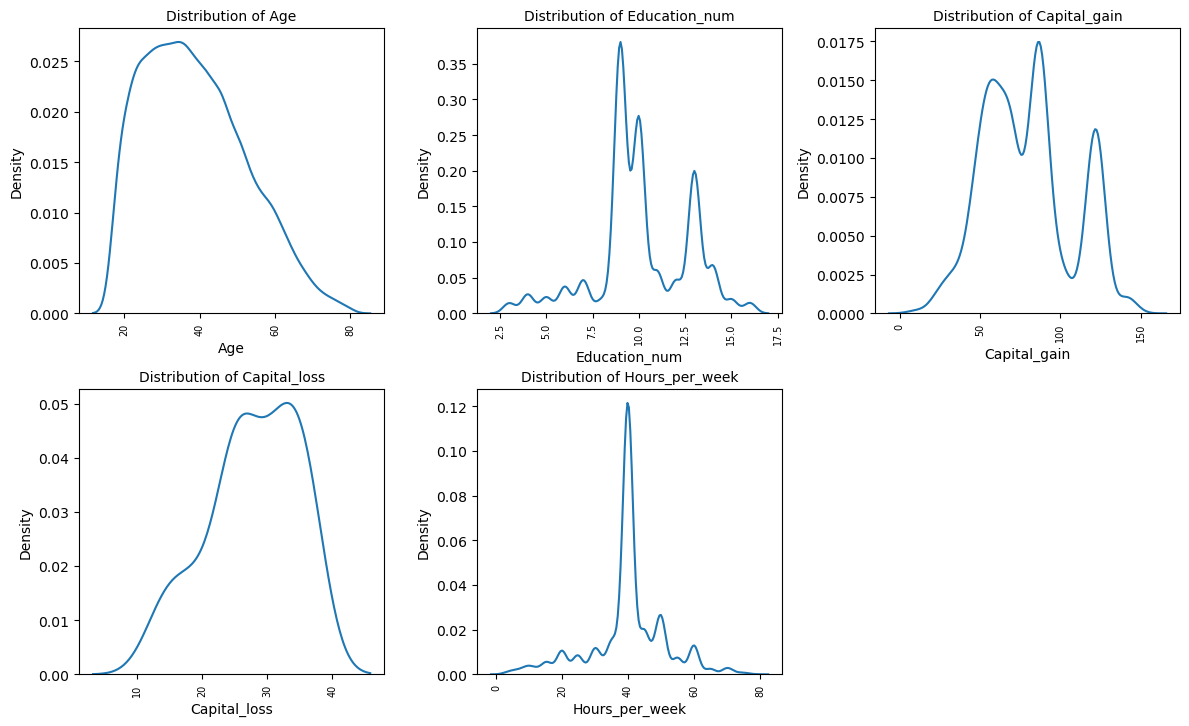

In [86]:
# plot countplots for numerical columns
plt.figure(figsize=(12, 25))

for i, col in enumerate(num_cols,1):
    plt.subplot(7,3,i)
    sns.kdeplot(df_in[col], palette='Set2') 
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xticks(rotation=90, fontsize=7)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with a strategy (mean, median, etc.)
imputer = SimpleImputer(strategy='mean')  # or strategy='median', etc.

# Impute missing values for specific columns
df_in['Capital_gain'] = imputer.fit_transform(df_in[['Capital_gain']])
df_in['Capital_loss'] = imputer.fit_transform(df_in[['Capital_loss']])


In [90]:
from sklearn.impute import SimpleImputer

imputer= SimpleImputer(strategy='mean')
df_in['Capital_gain'] = imputer.fit_transform(df_in[['Capital_gain']])
df_in['Capital_loss'] = imputer.fit_transform(df_in[['Capital_loss']])

 <div style= 'color: green;  padding :10px;'> <h3> Train/Test split</h3>  </div>

In [91]:
X=df_in.drop('Income', axis=1)
Y=df_in['Income']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

print(f'Training features dimension:,{X.shape}')
print(f'Testing features dimension:,{X_test.shape}')
print(f'Training features dimension:,{Y.shape}')
print(f'Testing features dimension:,{Y_test.shape}')

Training features dimension:,(26769, 13)
Testing features dimension:,(6693, 13)
Training features dimension:,(26769,)
Testing features dimension:,(6693,)


 <div style= 'color: green;  padding :10px;'> <h3> Standard Scaler</h3>  </div>

In [92]:
scaler = StandardScaler()

X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.830289,1.645732,-0.544048,1.150373,-0.825693,-0.804058,-0.928202,0.420224,0.730660,-1.726011e-15,1.144506e-14,-2.340303,0.305108
1,-0.061614,-0.080579,0.099591,-0.434574,1.595755,-0.301763,-0.313541,0.420224,0.730660,-1.726011e-15,1.144506e-14,0.000220,0.305108
2,1.053265,-0.080579,-1.187687,-1.227047,-0.825693,-0.301763,-0.928202,-1.825080,0.730660,-1.726011e-15,1.144506e-14,0.000220,0.305108
3,-0.804867,-0.080579,-0.544048,1.150373,-0.825693,0.702826,2.145101,-1.825080,-1.368625,-1.726011e-15,1.144506e-14,0.000220,-3.874374
4,-0.135940,-0.080579,0.743230,1.546609,-0.825693,-0.804058,2.145101,0.420224,-1.368625,-1.726011e-15,1.144506e-14,0.000220,0.305108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26764,1.053265,-0.080579,0.743230,1.546609,-0.825693,-0.804058,-0.928202,0.420224,0.730660,-1.726011e-15,1.144506e-14,0.000220,0.305108
26765,-1.250819,-0.080579,1.386869,-0.038337,0.385031,0.953973,-0.313541,0.420224,0.730660,-1.726011e-15,1.144506e-14,0.000220,0.305108
26766,-0.879193,-0.080579,-1.831326,0.754136,-0.825693,1.456268,2.145101,0.420224,-1.368625,-1.726011e-15,1.144506e-14,-0.173152,0.305108
26767,1.424892,-0.080579,0.099591,-0.434574,1.595755,-1.557500,1.530440,0.420224,-1.368625,-1.726011e-15,1.144506e-14,0.000220,0.305108


 <div style= 'color: green;  padding :10px;'> <h3> VIF</h3>  </div>

In [93]:
#find VIR for each column 

vif= pd.DataFrame()
vif['Features']= X.columns
vif['VIF Factor']=[variance_inflation_factor(X.values, i) for i in range (len(X.columns))]

vif.sort_values(by='VIF Factor', ascending=False)

,Features,VIF Factor
6,Relationship,1.709063
8,Sex,1.603391
4,Marital_status,1.181121
11,Hours_per_week,1.099035
3,Education_num,1.082228
0,Age,1.078725
2,Education,1.034312
7,Race,1.032784
9,Capital_gain,1.024361
12,Native_country,1.018303


- all less than 10

 <div style= 'color: green;  padding :10px;'> <h3> Over sampling</h3>  </div>

In [94]:
Y.value_counts()

0    20662
1     6107
Name: Income, dtype: int64

here we can see there is imbalance. 

In [95]:
#over sampling the data
SM=SMOTE()
x1,y1=SM.fit_resample(X,Y)

In [96]:
y1.value_counts()

0    20662
1    20662
Name: Income, dtype: int64

- now it is balanced

 <div style= 'color: blue;  padding :10px;'> <h3> Random Forest Classifier</h3>  </div>

In [97]:
maxAccu=0
maxRS=0

for i in range(1,500):
    X_train,X_test,Y_train,Y_test=train_test_split(x1,y1,test_size=0.3,random_state=i)
    
    
    rfc=RandomForestClassifier()
    rfc.fit(X_train,Y_train)
    pred=rfc.predict(X_test)
    acc=accuracy_score(Y_test, pred)

    if acc >maxAccu:
        maxAccu = acc
        maxRS= i
        
print(f'Best Accuracy score is {maxAccu} at random state {maxRS}')
    



Best Accuracy score is 0.8877238264236167 at random state 70


In [100]:
# create split 
X_train,X_test,Y_train,Y_test=train_test_split(x1,y1,test_size=0.3,random_state=maxRS)

In [101]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
pred_rfc=rfc.predict(X_test)

print(accuracy_score(Y_test, pred_rfc))
print(confusion_matrix(Y_test, pred_rfc))
print(classification_report(Y_test, pred_rfc))

0.8860300048394902
[[5352  769]
 [ 644 5633]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      6121
           1       0.88      0.90      0.89      6277

    accuracy                           0.89     12398
   macro avg       0.89      0.89      0.89     12398
weighted avg       0.89      0.89      0.89     12398



 <div style= 'color: blue;  padding :10px;'> <h3> Logistic Regression</h3>  </div>

In [102]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred_lr=lr.predict(X_test)

print(accuracy_score(Y_test, pred_lr))
print(confusion_matrix(Y_test, pred_lr))
print(classification_report(Y_test, pred_lr))

0.7898048072269721
[[4761 1360]
 [1246 5031]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      6121
           1       0.79      0.80      0.79      6277

    accuracy                           0.79     12398
   macro avg       0.79      0.79      0.79     12398
weighted avg       0.79      0.79      0.79     12398



 <div style= 'color: blue;  padding :10px;'> <h3> Decision Tree Classifier</h3>  </div>

In [103]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
pred_dtc=dtc.predict(X_test)

print(accuracy_score(Y_test, pred_dtc))
print(confusion_matrix(Y_test, pred_dtc))
print(classification_report(Y_test, pred_dtc))

0.8429585417002743
[[5205  916]
 [1031 5246]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      6121
           1       0.85      0.84      0.84      6277

    accuracy                           0.84     12398
   macro avg       0.84      0.84      0.84     12398
weighted avg       0.84      0.84      0.84     12398



 <div style= 'color: blue;  padding :10px;'> <h3> SVC</h3>  </div>

In [104]:
svc=SVC()
svc.fit(X_train,Y_train)
pred_svc=svc.predict(X_test)

print(accuracy_score(Y_test, pred_svc))
print(confusion_matrix(Y_test, pred_svc))
print(classification_report(Y_test, pred_svc))

0.8400548475560574
[[4769 1352]
 [ 631 5646]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      6121
           1       0.81      0.90      0.85      6277

    accuracy                           0.84     12398
   macro avg       0.84      0.84      0.84     12398
weighted avg       0.84      0.84      0.84     12398



 <div style= 'color: blue;  padding :10px;'> <h3> ADA booster</h3>  </div>

In [105]:
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
pred_ada=ada.predict(X_test)

print(accuracy_score(Y_test, pred_ada))
print(confusion_matrix(Y_test, pred_ada))
print(classification_report(Y_test, pred_ada))

0.8512663332795612
[[5163  958]
 [ 886 5391]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      6121
           1       0.85      0.86      0.85      6277

    accuracy                           0.85     12398
   macro avg       0.85      0.85      0.85     12398
weighted avg       0.85      0.85      0.85     12398



 <div style= 'color: blue;  padding :10px;'> <h3> Gradient Boosting Classifier </h3>  </div>

In [116]:
grad=GradientBoostingClassifier()
grad.fit(X_train,Y_train)
pred_grad=grad.predict(X_test)

print(accuracy_score(Y_test, pred_grad))
print(confusion_matrix(Y_test, pred_grad))
print(classification_report(Y_test, pred_grad))

0.8662687530246814
[[5086 1035]
 [ 623 5654]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      6121
           1       0.85      0.90      0.87      6277

    accuracy                           0.87     12398
   macro avg       0.87      0.87      0.87     12398
weighted avg       0.87      0.87      0.87     12398



 <div style= 'color: blue;  padding :10px;'> <h3> Bagging Classifier</h3>  </div>

In [117]:
bag=BaggingClassifier()
bag.fit(X_train,Y_train)
pred_bag=bag.predict(X_test)

print(accuracy_score(Y_test, pred_bag))
print(confusion_matrix(Y_test, pred_bag))
print(classification_report(Y_test, pred_bag))

0.8728020648491692
[[5397  724]
 [ 853 5424]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      6121
           1       0.88      0.86      0.87      6277

    accuracy                           0.87     12398
   macro avg       0.87      0.87      0.87     12398
weighted avg       0.87      0.87      0.87     12398



 <div style= 'color: blue;  padding :10px;'> <h3> Extra Tree</h3>  </div>

In [108]:
ext=ExtraTreesClassifier()
ext.fit(X_train,Y_train)
pred_ext=ext.predict(X_test)

print(accuracy_score(Y_test, pred_ext))
print(confusion_matrix(Y_test, pred_ext))
print(classification_report(Y_test, pred_ext))

0.8865139538635264
[[5340  781]
 [ 626 5651]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      6121
           1       0.88      0.90      0.89      6277

    accuracy                           0.89     12398
   macro avg       0.89      0.89      0.89     12398
weighted avg       0.89      0.89      0.89     12398



 <div style= 'color: blue;  padding :10px;'> <h3> Cross Validation Score </h3>  </div>

In [109]:
score= cross_val_score(rfc, x1, y1)
print(score)
print(score.mean())

print('Difference between accuracy score and crossvalidation score is:', accuracy_score(Y_test, pred_rfc) - score.mean())

[0.8015729  0.861585   0.9138536  0.91966122 0.9178364 ]
0.8829018230223555
Difference between accuracy score and crossvalidation score is: 0.003128181817134701


In [110]:
score= cross_val_score(lr, x1, y1)
print(score)
print(score.mean())

print('Difference between accuracy score and crossvalidation score is:', accuracy_score(Y_test, pred_lr) - score.mean())



[0.77471264 0.77894737 0.78354507 0.78209316 0.785697  ]
0.7809990489291961
Difference between accuracy score and crossvalidation score is: 0.008805758297775967


In [111]:
score= cross_val_score(dtc, x1, y1)
print(score)
print(score.mean())

print('Difference between accuracy score and crossvalidation score is:', accuracy_score(Y_test, pred_dtc) - score.mean())

[0.73454325 0.8169389  0.87743497 0.87307925 0.88080833]
0.8365609391004298
Difference between accuracy score and crossvalidation score is: 0.006397602599844454


In [112]:
score= cross_val_score(svc, x1, y1)
print(score)
print(score.mean())

print('Difference between accuracy score and crossvalidation score is:', accuracy_score(Y_test, pred_svc) - score.mean())

[0.82323049 0.82867514 0.83436177 0.8354507  0.84002904]
0.832349425990118
Difference between accuracy score and crossvalidation score is: 0.007705421565939452


In [113]:
score= cross_val_score(grad, x1, y1)
print(score)
print(score.mean())

print('Difference between accuracy score and crossvalidation score is:', accuracy_score(Y_test, pred_grad) - score.mean())

[0.82056866 0.84996975 0.86715064 0.87441016 0.87766215]
0.8579522725262937
Difference between accuracy score and crossvalidation score is: 0.008316480498387735


In [114]:
score= cross_val_score(bag, x1, y1)
print(score)
print(score.mean())

print('Difference between accuracy score and crossvalidation score is:', accuracy_score(Y_test, pred_bag) - score.mean())

[0.74640048 0.84198427 0.9046582  0.90756201 0.91335915]
0.8627928217579701
Difference between accuracy score and crossvalidation score is: 0.008315421507072651


In [115]:
score= cross_val_score(ext, x1, y1)
print(score)
print(score.mean())

print('Difference between accuracy score and crossvalidation score is:', accuracy_score(Y_test, pred_ext) - score.mean())

[0.82504537 0.86836056 0.90937689 0.92087114 0.91553727]
0.8878382465159126
Difference between accuracy score and crossvalidation score is: -0.0013242926523862053


-Extra tree classifier is our best model as it has the smallest accuracy difference.

 <div style= 'color: blue;  padding :10px;'> <h3> Hyperparameter tuning </h3>  </div>

In [118]:
param_grid= {
    'n_estimators': [200,300,400],
    'max_depth': [20,30,40],
    'min_samples_split': [2,5], 
    'min_samples_leaf':[1,2],
    'max_features': ['auto', 'sqrt']
}

In [119]:
Grid_search=GridSearchCV(estimator= ext,
                        param_grid=param_grid,
                        cv=5,
                        verbose=2,
                        n_jobs=-1)

In [120]:
Grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 40],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 300, 400]},
             verbose=2)

In [121]:
print(' best hyper parameter (grid Search):',Grid_search.best_params_)

 best hyper parameter (grid Search): {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}


In [122]:
best_grid_model= Grid_search.best_estimator_

pred_= best_grid_model.predict(X_test)


print('Accuracy:', accuracy_score(Y_test, pred_))
print('Confusion matrix:', confusion_matrix(Y_test, pred_))
print('Classifiaction Report:', classification_report(Y_test, pred_))

Accuracy: 0.8967575415389579
Confusion matrix: [[5291  830]
 [ 450 5827]]
Classifiaction Report:               precision    recall  f1-score   support

           0       0.92      0.86      0.89      6121
           1       0.88      0.93      0.90      6277

    accuracy                           0.90     12398
   macro avg       0.90      0.90      0.90     12398
weighted avg       0.90      0.90      0.90     12398



 <div style= 'color: blue;  padding :10px;'> <h3> roc auc curve </h3>  </div>

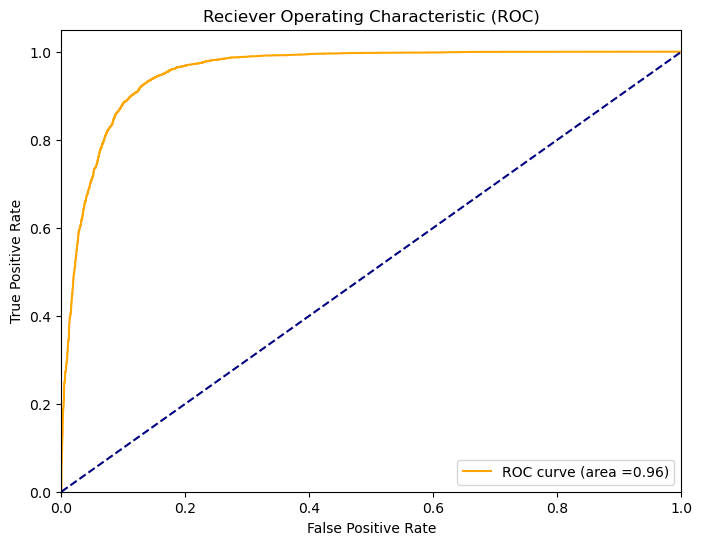

In [124]:
Y_test_prob= best_grid_model.predict_proba(X_test)[:,1]

#calc ROC

fpr,tpr, thresholds=roc_curve(Y_test, Y_test_prob)
roc_auc=roc_auc_score(Y_test, Y_test_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area ={roc_auc:.2f})')
plt.plot([0,1], [0,1] ,color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

 <div style= 'color: blue;  padding :10px;'> <h3> Save model </h3>  </div>

In [125]:
import joblib
joblib.dump(best_grid_model, 'final_model.joblib')

#load model
model_loaded=joblib.load ('final_model.joblib')